In [1]:
import re
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
pd.options.display.max_columns=15
pd.options.display.max_rows=1400

# GETTING THE REQURIED DATA AND CONVERTING INTO DATAFRAME

In [4]:
NAMES=['Mohammad Rizwan','Aiden Markram','Babar Azam','Aaron Finch','Pathum Nissanka','Martin Guptill','Rassie van der Dussen','Rohit Sharma','Virat Kohli','Jos Buttler','Quinton de Kock','KL Rahul','Jason Roy','Paul Stirling','Shreyas Iyer','Glenn Maxwell','Mitchell Marsh','Jonny Bairstow','Charith Asalanka','Mahmudullah','David Warner','Dasun Shanaka','Heinrich Klaasen','Andrew Balbirnie','Kusal Mendis','Fakhar Zaman','Kane Williamson','Rishabh Pant','Ibrahim Zadran','Temba Bavuma','Shakib Al Hasan','Sean Williams','James Neesham','Shimron Hetmyer','Hardik Pandya','Sikandar Raza','Kusal Perera','MS Dhoni','Ravindra Jadeja','Jasprit Bumrah','Ravichandran Ashwin','Shikhar Dhawan','Chris Gayle','Rashid Khan']
NAME=['Mohammad+Rizwan','Aiden+Markram','Babar+Azam','Aaron+Finch','Pathum+Nissanka','Martin+Guptill','Rassie+van+der+Dussen','RG+Sharma','Virat+Kohli','Jos+Buttler','Quinton+de+Kock','KL+Rahul','Jason+Roy','Paul+Stirling','Shreyas+Iyer','Glenn+Maxwell','Mitchell+Marsh','Jonny+Bairstow','Charith+Asalanka','Mahmudullah','David+Warner','Dasun+Shanaka','Heinrich+Klaasen','Andrew+Balbirnie','Kusal+Mendis','Fakhar+Zaman','Kane+Williamson','Rishabh+Pant','Ibrahim+Zadran','Temba+Bavuma','Shakib+Al+Hasan','Sean+Williams','James+Neesham','Shimron+Hetmyer','Hardik+Pandya','Sikandar+Raza','Kusal+Perera','MS+Dhoni','Ravindra+Jadeja','Jasprit+Bumrah','Ravichandran+Ashwin','Shikhar+Dhawan','Chris+Gayle','Rashid+Khan']
url1='http://www.cricmetric.com/playerstats.py?player='
url2='&role=all&format=all&groupby=year&start_date=2002-01-01&end_date=2022-09-15&start_over=0&end_over=9999'
for n in range(len(NAME)):
    url=url1+NAME[n]+url2
    li=[]
    page1 = rq.get(url)
    soup1 = BeautifulSoup(page1.text)
    b=soup1.find_all('table',class_='table scoretable')
    for t in range(len(b)):
        c=b[t].text
        if c[1:16]=='YearInningsRuns': li.append(t)
    for i in range(len(b)):
        a=b[i].text
        if a[1:16]=='YearInningsRuns':
            rows=re.findall(r'\d{4}\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+\s\s\d+\.\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+|\d{4}\s\s\d+\s\s\d+\,\d+\s\s\d+\,\d+\s\s\d+\s\s\d+\.\d+\s\s\d+\.\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+|\d{4}\s\s\d+\s\s\d+\s\s\d+\,\d+\s\s\d+\s\s\d+\.\d+\s\s\d+\.\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+|\d{4}\s\s\d+\s\s\d+\,\d+\s\s\d+\s\s\d+\s\s\d+\.\d+\s\s\d+\.\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+|\d{4}\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\-\s\s\d+\.\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\s\s\d+\.\d+',b[i].text)
            stat=[]
            for k in rows:
                stat.append(k.split('  '))
            years=[]
            innings=[]
            runs=[]
            balls=[]
            outs=[]
            avgs=[]
            sr=[]
            hs=[]
            fif=[]
            hun=[]
            fours=[]
            sixs=[]
            dot=[]
            for j in stat:
                years.append(j[0])
                innings.append(j[1])
                runs.append(j[2])
                balls.append(j[3])
                outs.append(j[4])
                avgs.append(j[5])
                sr.append(j[6])
                hs.append(j[7])
                fif.append(j[8])
                hun.append(j[9])
                fours.append(j[10])
                sixs.append(j[11])
                dot.append(j[12])
            if i==li[0] and n==0:
                dataframe=pd.DataFrame(data={'TYPE':'TEST','NAME':NAMES[n],'YEAR':years,'INNINGS':innings,'RUNS':runs,'BALLS':balls,'OUTS':outs,'AVERAGES':avgs,'STRIKE_RATE':sr,'HIGH_SCORE':hs,'FIFTYS':fif,'HUNDREDS':hun,'FOURS':fours,'SIXS':sixs,'DOTS(%)':dot})
            elif i==li[0] and n>0:
                for l in range(len(years)):
                    dataframe=dataframe.append({'TYPE':'TEST','NAME':NAMES[n],'YEAR':years[l],'INNINGS':innings[l],'RUNS':runs[l],'BALLS':balls[l],'OUTS':outs[l],'AVERAGES':avgs[l],'STRIKE_RATE':sr[l],'HIGH_SCORE':hs[l],'FIFTYS':fif[l],'HUNDREDS':hun[l],'FOURS':fours[l],'SIXS':sixs[l],'DOTS(%)':dot[l]},ignore_index=True)
            elif i==li[1]:
                for m in range(len(years)):
                    dataframe=dataframe.append({'TYPE':'ODI','NAME':NAMES[n],'YEAR':years[m],'INNINGS':innings[m],'RUNS':runs[m],'BALLS':balls[m],'OUTS':outs[m],'AVERAGES':avgs[m],'STRIKE_RATE':sr[m],'HIGH_SCORE':hs[m],'FIFTYS':fif[m],'HUNDREDS':hun[m],'FOURS':fours[m],'SIXS':sixs[m],'DOTS(%)':dot[m]},ignore_index=True)
            elif i==li[2]:
                for l in range(len(years)):
                    dataframe=dataframe.append({'TYPE':'T20','NAME':NAMES[n],'YEAR':years[l],'INNINGS':innings[l],'RUNS':runs[l],'BALLS':balls[l],'OUTS':outs[l],'AVERAGES':avgs[l],'STRIKE_RATE':sr[l],'HIGH_SCORE':hs[l],'FIFTYS':fif[l],'HUNDREDS':hun[l],'FOURS':fours[l],'SIXS':sixs[l],'DOTS(%)':dot[l]},ignore_index=True)
            elif i==li[3]:
                for l in range(len(years)):
                    dataframe=dataframe.append({'TYPE':'PL','NAME':NAMES[n],'YEAR':years[l],'INNINGS':innings[l],'RUNS':runs[l],'BALLS':balls[l],'OUTS':outs[l],'AVERAGES':avgs[l],'STRIKE_RATE':sr[l],'HIGH_SCORE':hs[l],'FIFTYS':fif[l],'HUNDREDS':hun[l],'FOURS':fours[l],'SIXS':sixs[l],'DOTS(%)':dot[l]},ignore_index=True)
dataframe

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
0,TEST,Mohammad Rizwan,2016,2,13,34,1,13.0,38.2,13,0,0,2,0,79.4
1,TEST,Mohammad Rizwan,2019,6,202,306,5,40.4,66.0,95,1,0,24,0,65.4
2,TEST,Mohammad Rizwan,2020,7,302,692,7,43.1,43.6,72,4,0,29,1,76.6
3,TEST,Mohammad Rizwan,2021,13,455,907,10,45.5,50.2,115,2,1,60,2,75.2
4,TEST,Mohammad Rizwan,2022,9,260,469,7,37.1,55.4,104,0,1,28,1,68.9
5,ODI,Mohammad Rizwan,2015,12,332,346,9,36.9,96.0,75,3,0,30,5,45.7
6,ODI,Mohammad Rizwan,2016,6,77,85,5,15.4,90.6,34,0,0,6,0,42.4
7,ODI,Mohammad Rizwan,2017,4,51,81,3,17.0,63.0,21,0,0,2,0,56.8
8,ODI,Mohammad Rizwan,2019,6,245,275,5,49.0,89.1,115,0,2,23,1,44.0
9,ODI,Mohammad Rizwan,2020,3,25,60,3,8.3,41.7,14,0,0,0,0,61.7


# CONVERTING DATAFRAME TO CSV FORMAT 

In [5]:
data=dataframe.to_csv(r'C:\Users\ADMIN\python files\web sracpping\cricket_final.csv',index=False)


# GETTING THE INFORMATION OF THE DATAFRAME

In [2]:
dataframe=pd.read_csv(r'C:\Users\ADMIN\python files\web sracpping\cricket_final.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         1425 non-null   object 
 1   NAME         1425 non-null   object 
 2   YEAR         1425 non-null   int64  
 3   INNINGS      1425 non-null   int64  
 4   RUNS         1425 non-null   object 
 5   BALLS        1425 non-null   object 
 6   OUTS         1425 non-null   int64  
 7   AVERAGES     1425 non-null   object 
 8   STRIKE_RATE  1425 non-null   float64
 9   HIGH_SCORE   1425 non-null   int64  
 10  FIFTYS       1425 non-null   int64  
 11  HUNDREDS     1425 non-null   int64  
 12  FOURS        1425 non-null   int64  
 13  SIXS         1425 non-null   int64  
 14  DOTS(%)      1425 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 167.1+ KB


In [4]:
dataframe

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
0,TEST,Mohammad Rizwan,2016,2,13,34,1,13.0,38.2,13,0,0,2,0,79.4
1,TEST,Mohammad Rizwan,2019,6,202,306,5,40.4,66.0,95,1,0,24,0,65.4
2,TEST,Mohammad Rizwan,2020,7,302,692,7,43.1,43.6,72,4,0,29,1,76.6
3,TEST,Mohammad Rizwan,2021,13,455,907,10,45.5,50.2,115,2,1,60,2,75.2
4,TEST,Mohammad Rizwan,2022,9,260,469,7,37.1,55.4,104,0,1,28,1,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,PL,Rashid Khan,2018,17,125,78,12,10.4,160.3,34,0,0,7,11,44.9
1421,PL,Rashid Khan,2019,25,218,131,20,10.9,166.4,40,0,0,17,15,39.7
1422,PL,Rashid Khan,2020,25,205,168,19,10.8,122.0,29,0,0,13,12,44.6
1423,PL,Rashid Khan,2021,31,266,196,24,11.1,135.7,27,0,0,29,9,40.3


1) THERE ARE 1425 DATA POINTS AND 15 LABELS 

2) ALL THE DATA TYPES ARE OBJECTS WHICH ARE NEED TO BE CONVERTED AS PER DATA UNDER THE LABELS 

3) THERE ARE 0 NULL VALUES

# DATA CLEANING

In [10]:
dataframe['YEAR']=dataframe['YEAR'].astype(int)
dataframe['INNINGS']=dataframe['INNINGS'].astype(int)
dataframe['OUTS']=dataframe['OUTS'].astype(int)
dataframe['STRIKE_RATE']=dataframe['STRIKE_RATE'].astype(float)
dataframe['HIGH_SCORE']=dataframe['HIGH_SCORE'].astype(int)
dataframe['FIFTYS']=dataframe['FIFTYS'].astype(int)
dataframe['HUNDREDS']=dataframe['HUNDREDS'].astype(int)
dataframe['FOURS']=dataframe['FOURS'].astype(int)
dataframe['SIXS']=dataframe['SIXS'].astype(int)
dataframe['DOTS(%)']=dataframe['DOTS(%)'].astype(float)

HERE WE HAVE CONVERTED DATA TYPES OF LABELS 'YEAR','INNINGS','OUTS','STRIKE_RATE','HIGH_SCORE','FIFTYS','HUNDREDS','FOURS','SIXS','DOTS(%)'

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         1425 non-null   object 
 1   NAME         1425 non-null   object 
 2   YEAR         1425 non-null   int32  
 3   INNINGS      1425 non-null   int32  
 4   RUNS         1425 non-null   object 
 5   BALLS        1425 non-null   object 
 6   OUTS         1425 non-null   int32  
 7   AVERAGES     1425 non-null   object 
 8   STRIKE_RATE  1425 non-null   float64
 9   HIGH_SCORE   1425 non-null   int32  
 10  FIFTYS       1425 non-null   int32  
 11  HUNDREDS     1425 non-null   int32  
 12  FOURS        1425 non-null   int32  
 13  SIXS         1425 non-null   int32  
 14  DOTS(%)      1425 non-null   float64
dtypes: float64(2), int32(8), object(5)
memory usage: 122.6+ KB


In [12]:
dataframe['RUNS']=dataframe['RUNS'].str.replace(',','')
dataframe['BALLS']=dataframe['BALLS'].str.replace(',','')

REMOVING THE SEPCIAL SYMBOLS FROM THE CLOUMNS 'RUNS','BALLS' 

In [13]:
dataframe['RUNS']=dataframe['RUNS'].astype(int)
dataframe['BALLS']=dataframe['BALLS'].astype(int)

CONVERTING THE DATA TYPES OF THE CLOUMNS 'RUNS','BALLS'

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         1425 non-null   object 
 1   NAME         1425 non-null   object 
 2   YEAR         1425 non-null   int32  
 3   INNINGS      1425 non-null   int32  
 4   RUNS         1425 non-null   int32  
 5   BALLS        1425 non-null   int32  
 6   OUTS         1425 non-null   int32  
 7   AVERAGES     1425 non-null   object 
 8   STRIKE_RATE  1425 non-null   float64
 9   HIGH_SCORE   1425 non-null   int32  
 10  FIFTYS       1425 non-null   int32  
 11  HUNDREDS     1425 non-null   int32  
 12  FOURS        1425 non-null   int32  
 13  SIXS         1425 non-null   int32  
 14  DOTS(%)      1425 non-null   float64
dtypes: float64(2), int32(10), object(3)
memory usage: 111.5+ KB


In [15]:
dataframe.drop(dataframe[dataframe['AVERAGES']=='-'].index,inplace=True)

In [16]:
dataframe['AVERAGES']=dataframe['AVERAGES'].astype(float)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1424
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         1405 non-null   object 
 1   NAME         1405 non-null   object 
 2   YEAR         1405 non-null   int32  
 3   INNINGS      1405 non-null   int32  
 4   RUNS         1405 non-null   int32  
 5   BALLS        1405 non-null   int32  
 6   OUTS         1405 non-null   int32  
 7   AVERAGES     1405 non-null   float64
 8   STRIKE_RATE  1405 non-null   float64
 9   HIGH_SCORE   1405 non-null   int32  
 10  FIFTYS       1405 non-null   int32  
 11  HUNDREDS     1405 non-null   int32  
 12  FOURS        1405 non-null   int32  
 13  SIXS         1405 non-null   int32  
 14  DOTS(%)      1405 non-null   float64
dtypes: float64(3), int32(10), object(2)
memory usage: 120.7+ KB


In [4]:
dataframe.to_csv(r'C:\Users\ADMIN\python files\web sracpping\cricket_final_cleaned.csv',index=False)

In [3]:
dataframe=pd.read_csv(r'C:\Users\ADMIN\python files\web sracpping\cricket_final_cleaned.csv')

# TEST MATCH 

In [17]:
test=dataframe.groupby('TYPE').get_group('TEST')

In [18]:
test.pivot_table(index='YEAR',columns='NAME',values='AVERAGES',aggfunc={'AVERAGES':np.mean},fill_value=" ")

NAME,Aaron Finch,Aiden Markram,Andrew Balbirnie,Babar Azam,Charith Asalanka,Chris Gayle,Dasun Shanaka,David Warner,Fakhar Zaman,Glenn Maxwell,Hardik Pandya,Heinrich Klaasen,Ibrahim Zadran,James Neesham,Jason Roy,Jasprit Bumrah,Jonny Bairstow,Jos Buttler,KL Rahul,Kane Williamson,Kusal Mendis,Kusal Perera,MS Dhoni,Mahmudullah,Martin Guptill,Mitchell Marsh,Mohammad Rizwan,Pathum Nissanka,Paul Stirling,Quinton de Kock,Rashid Khan,Rassie van der Dussen,Ravichandran Ashwin,Ravindra Jadeja,Rishabh Pant,Rohit Sharma,Sean Williams,Shakib Al Hasan,Shikhar Dhawan,Shimron Hetmyer,Shreyas Iyer,Sikandar Raza,Temba Bavuma,Virat Kohli
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002,,,,,,41.6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,22.8,,,,,,,
2003,,,,,,24.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004,,,,,,54.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,,,,,,41.1,,,,,,,,,,,,,,,,,37.2,,,,,,,,,,,,,,,,,,,,,
2006,,,,,,38.3,,,,,,,,,,,,,,,,,29.3,,,,,,,,,,,,,,,,,,,,,
2007,,,,,,35.0,,,,,,,,,,,,,,,,,52.0,,,,,,,,,,,,,,,19.2,,,,,,
2008,,,,,,53.3,,,,,,,,,,,,,,,,,35.2,,,,,,,,,,,,,,,29.6,,,,,,
2009,,,,,,49.3,,,,,,,,,,,,,,,,,92.2,15.0,23.5,,,,,,,,,,,,,41.0,,,,,,
2010,,,,,,58.3,,,,,,,,,,,,,,42.4,,,41.6,41.9,50.2,,,,,,,,,,,,,33.1,,,,,,


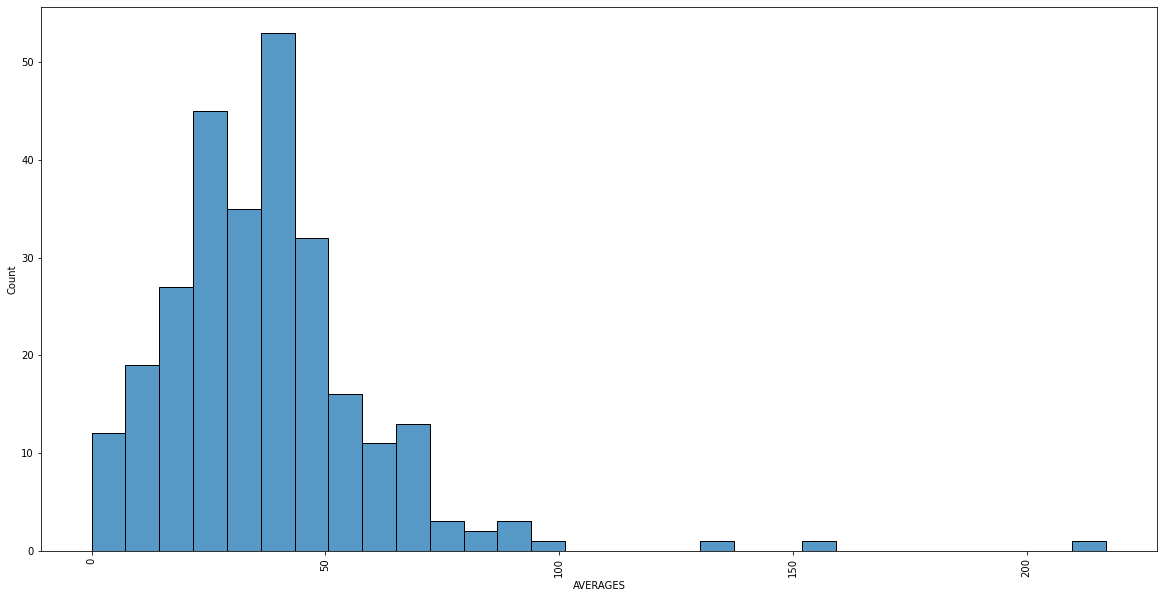

In [151]:
plt.figure(figsize=(20,10))
sb.histplot(data=test,x='AVERAGES')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

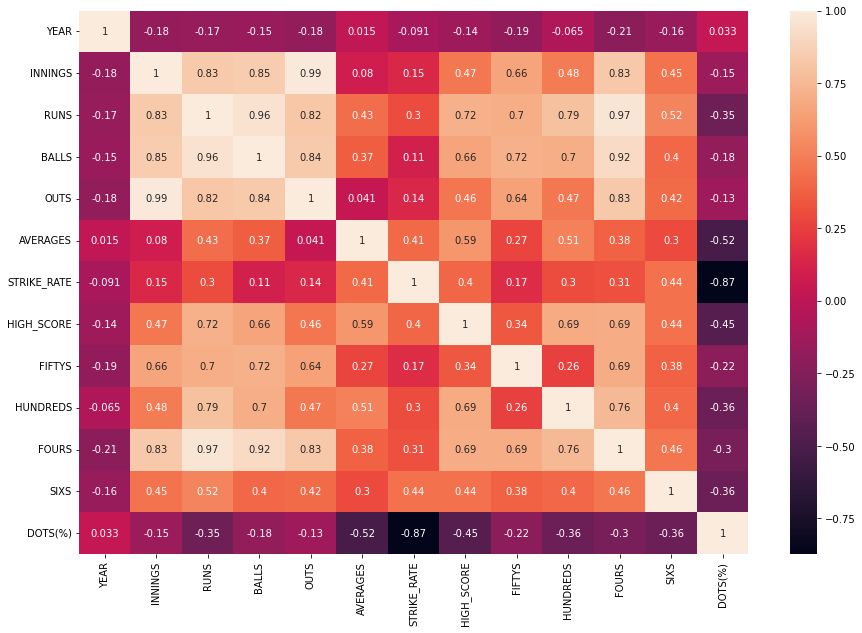

In [189]:
plt.figure(figsize=(15,10))
sb.heatmap(test.corr(),annot=True)

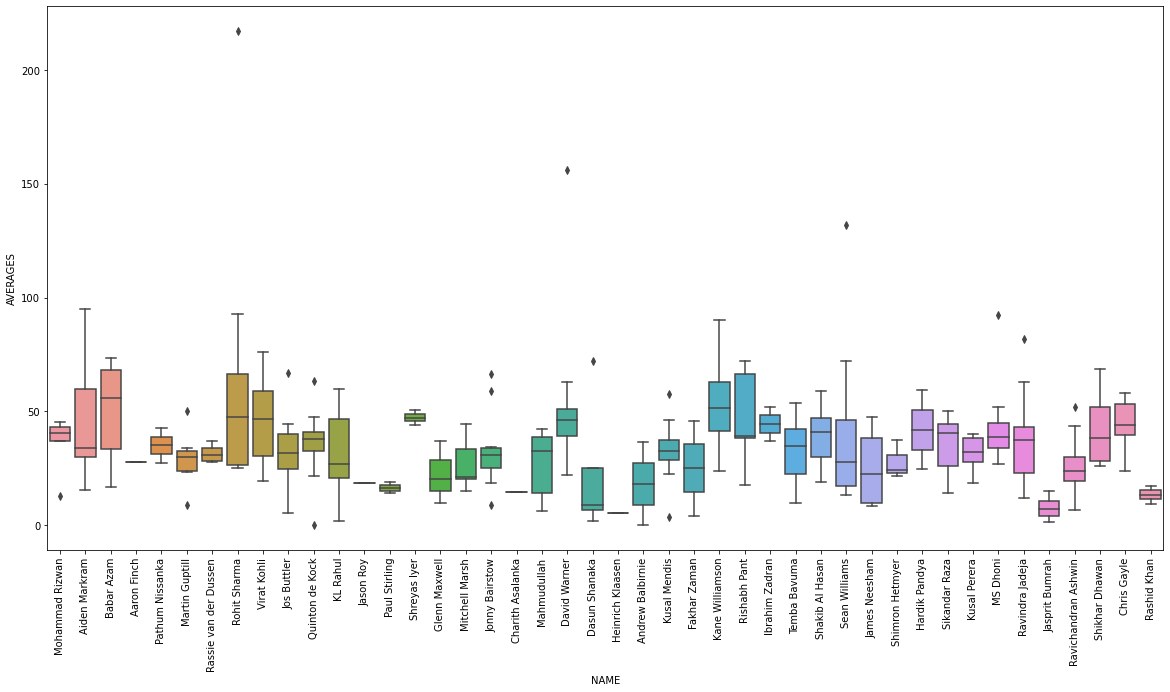

In [130]:
plt.figure(figsize=(20,10))
sb.boxplot(data=test,y=test['AVERAGES'],x=test['NAME'])
plt.xticks(rotation=90)
plt.show()

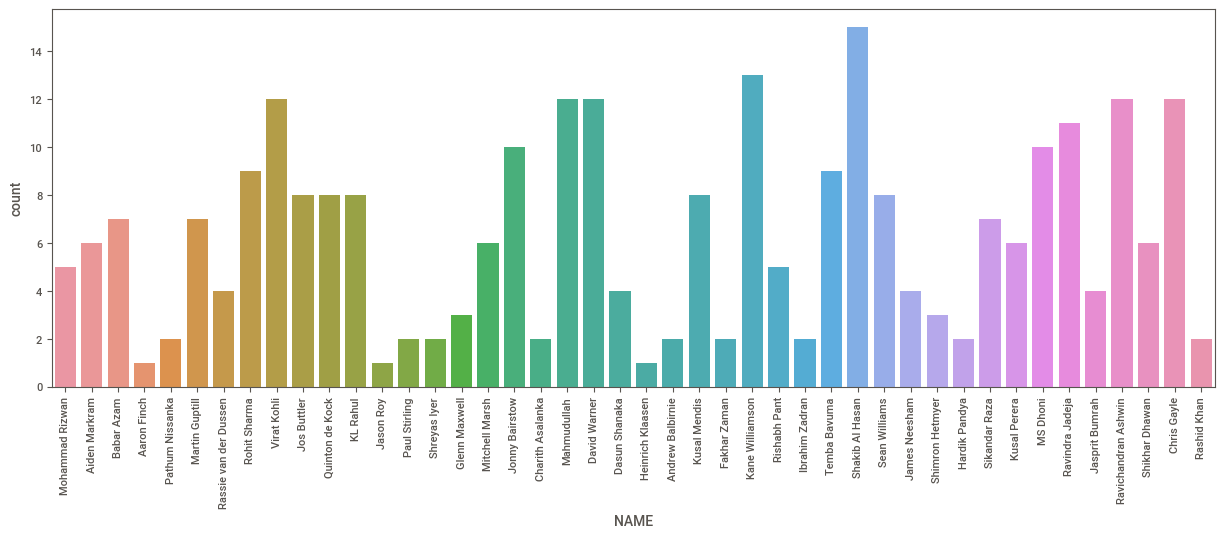

In [60]:
plt.figure(figsize=(15,5))
sb.countplot(x=test['NAME'])
plt.xticks(rotation=90)
plt.show()

In [21]:
len(test[test['NAME']=='Shakib Al Hasan'])

15

In [78]:
testcond=test[test['AVERAGES']>70]

In [79]:
avgtest=[]
for i in testcond['NAME'].unique():
    avgtest.append(testcond[testcond["NAME"]==i]['AVERAGES'].mean())
final_test=pd.DataFrame(avgtest,index=testcond['NAME'].unique())
final_test

,0
Aiden Markram,95.00
Babar Azam,73.40
Rohit Sharma,154.85
Virat Kohli,75.75
David Warner,156.00
Dasun Shanaka,72.00
Kane Williamson,86.60
Rishabh Pant,72.30
Sean Williams,102.15
MS Dhoni,92.20


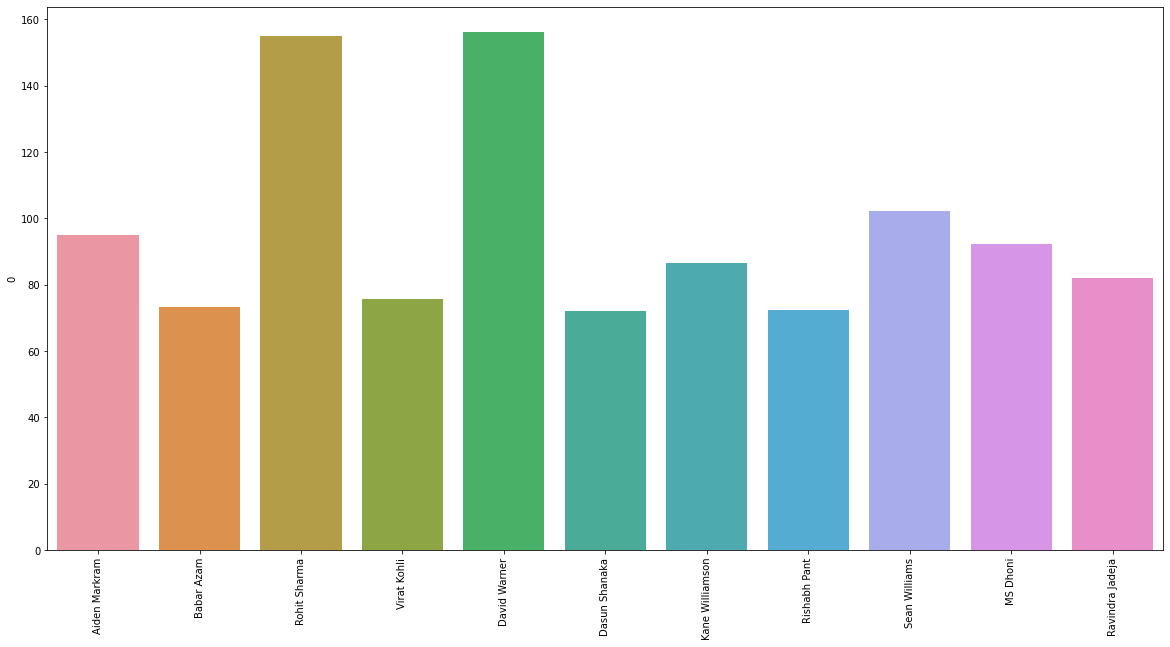

In [146]:
plt.figure(figsize=(20,10))
sb.barplot(data=final_test,y=0,x=final_test.index)
plt.xticks(rotation=90)
plt.title('')
plt.show()

# ODI MATCH

In [6]:
odi=dataframe.groupby('TYPE').get_group('ODI')

In [141]:
odi.pivot_table(index='YEAR',columns='NAME',values='STRIKE_RATE',aggfunc={'STRIKE_RATE':np.mean},fill_value=" ")

NAME,Aaron Finch,Aiden Markram,Andrew Balbirnie,Babar Azam,Charith Asalanka,Chris Gayle,Dasun Shanaka,David Warner,Fakhar Zaman,Glenn Maxwell,Hardik Pandya,Heinrich Klaasen,Ibrahim Zadran,James Neesham,Jason Roy,Jasprit Bumrah,Jonny Bairstow,Jos Buttler,KL Rahul,Kane Williamson,Kusal Mendis,Kusal Perera,MS Dhoni,Mahmudullah,Martin Guptill,Mitchell Marsh,Mohammad Rizwan,Pathum Nissanka,Paul Stirling,Quinton de Kock,Rashid Khan,Rassie van der Dussen,Ravichandran Ashwin,Ravindra Jadeja,Rishabh Pant,Rohit Sharma,Sean Williams,Shakib Al Hasan,Shikhar Dhawan,Shimron Hetmyer,Shreyas Iyer,Sikandar Raza,Temba Bavuma,Virat Kohli
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002,,,,,,88.6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003,,,,,,78.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004,,,,,,71.2,,,,,,,,,,,,,,,,,135.7,,,,,,,,,,,,,,,,,,,,,
2005,,,,,,88.7,,,,,,,,,,,,,,,,,102.9,,,,,,,,,,,,,,67.5,,,,,,,
2006,,,,,,83.8,,,,,,,,,,,,,,,,,93.0,,,,,,,,,,,,,,69.4,65.0,,,,,,
2007,,,,,,80.5,,,,,,,,,,,,,,,,,89.6,66.7,,,,,,,,,,,,82.4,90.5,56.7,,,,,,
2008,,,,,,91.7,,,,,,,,,,,,,,,,,82.3,60.5,,,,,24.2,,,,,,,72.6,66.7,70.0,,,,,,66.5
2009,,,,,,117.7,,77.4,,,,,,,,,,,,,,,85.6,72.9,82.0,,,,83.7,,,,,75.3,,65.8,73.0,106.2,,,,,,84.4
2010,,,36.8,,,97.0,,,,,,,,,,,,,,60.7,,,78.9,69.3,81.2,,,,88.9,,,,111.8,78.0,,86.0,71.4,80.0,0.0,,,,,85.1


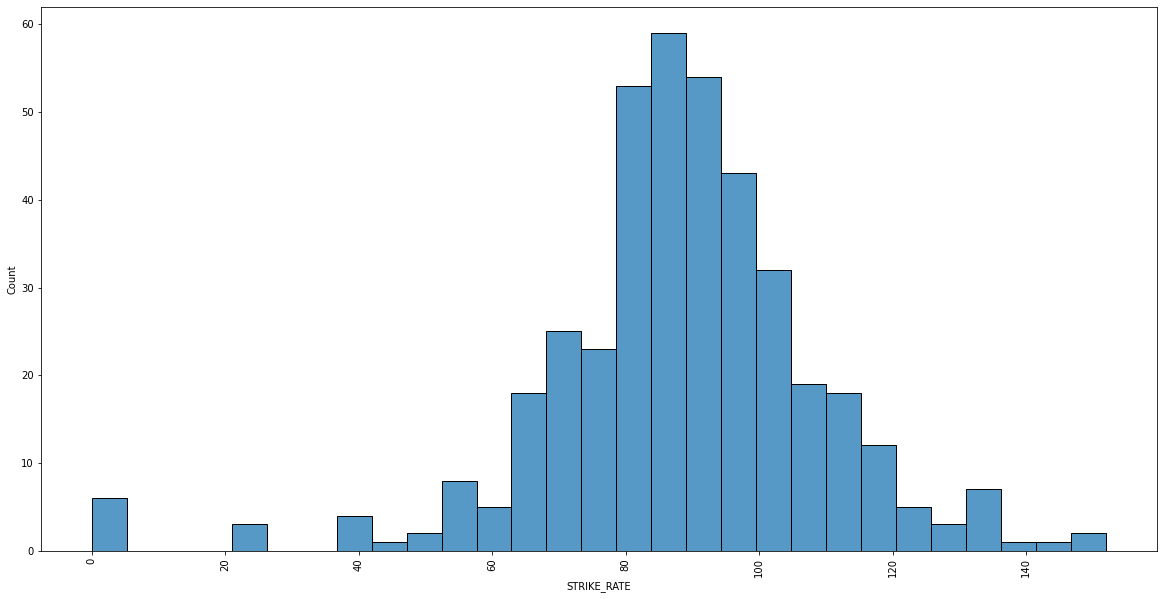

In [152]:
plt.figure(figsize=(20,10))
sb.histplot(data=odi,x='STRIKE_RATE')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

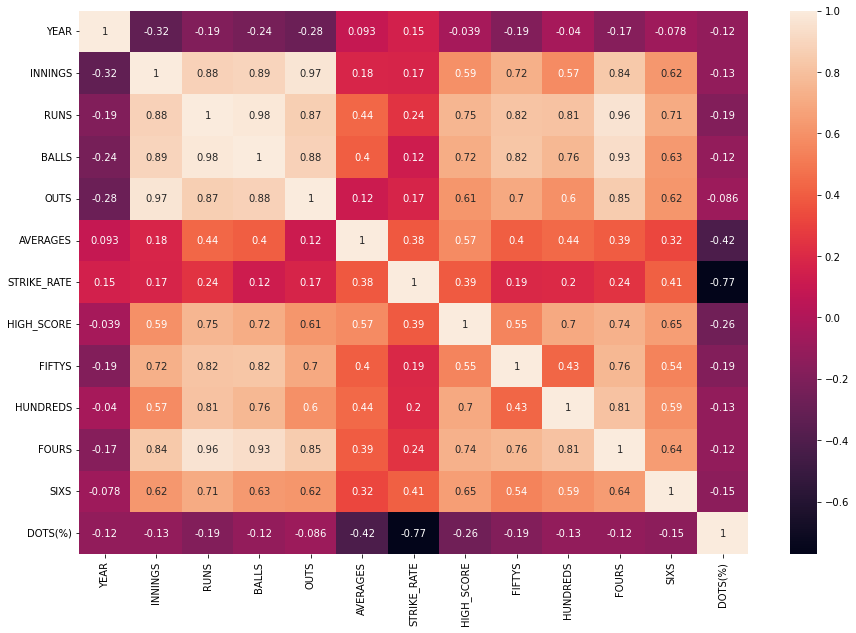

In [190]:
plt.figure(figsize=(15,10))
sb.heatmap(odi.corr(),annot=True)

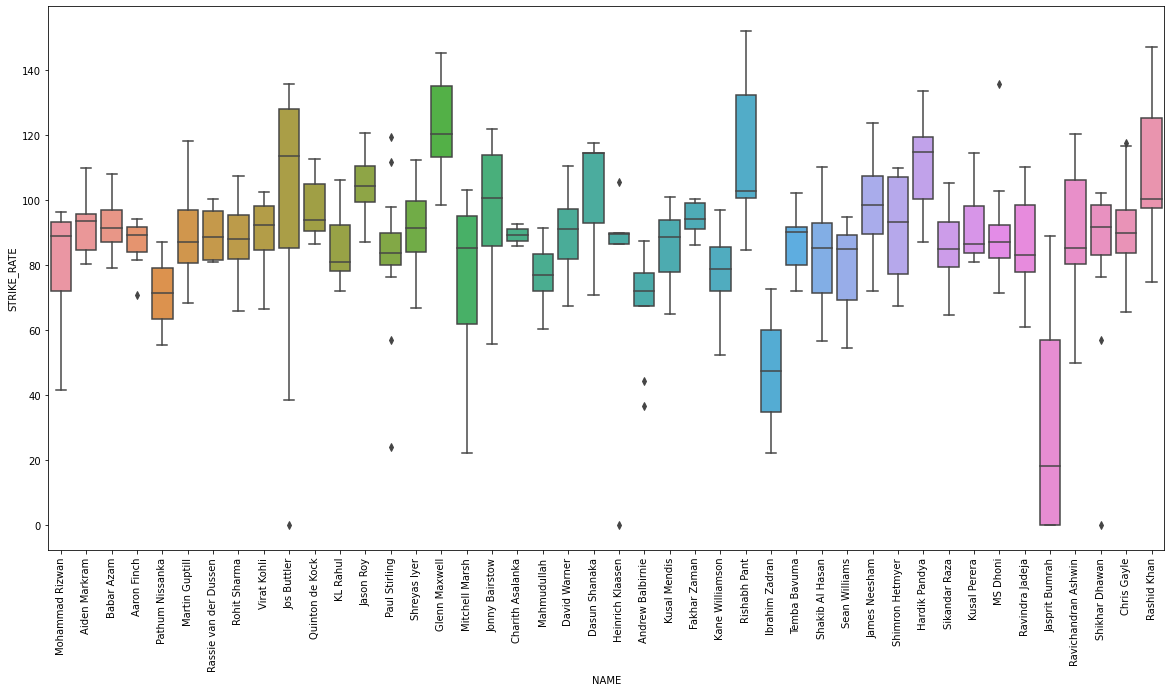

In [134]:
plt.figure(figsize=(20,10))
sb.boxplot(data=odi,y='STRIKE_RATE',x='NAME')
plt.xticks(rotation=90)
plt.show()

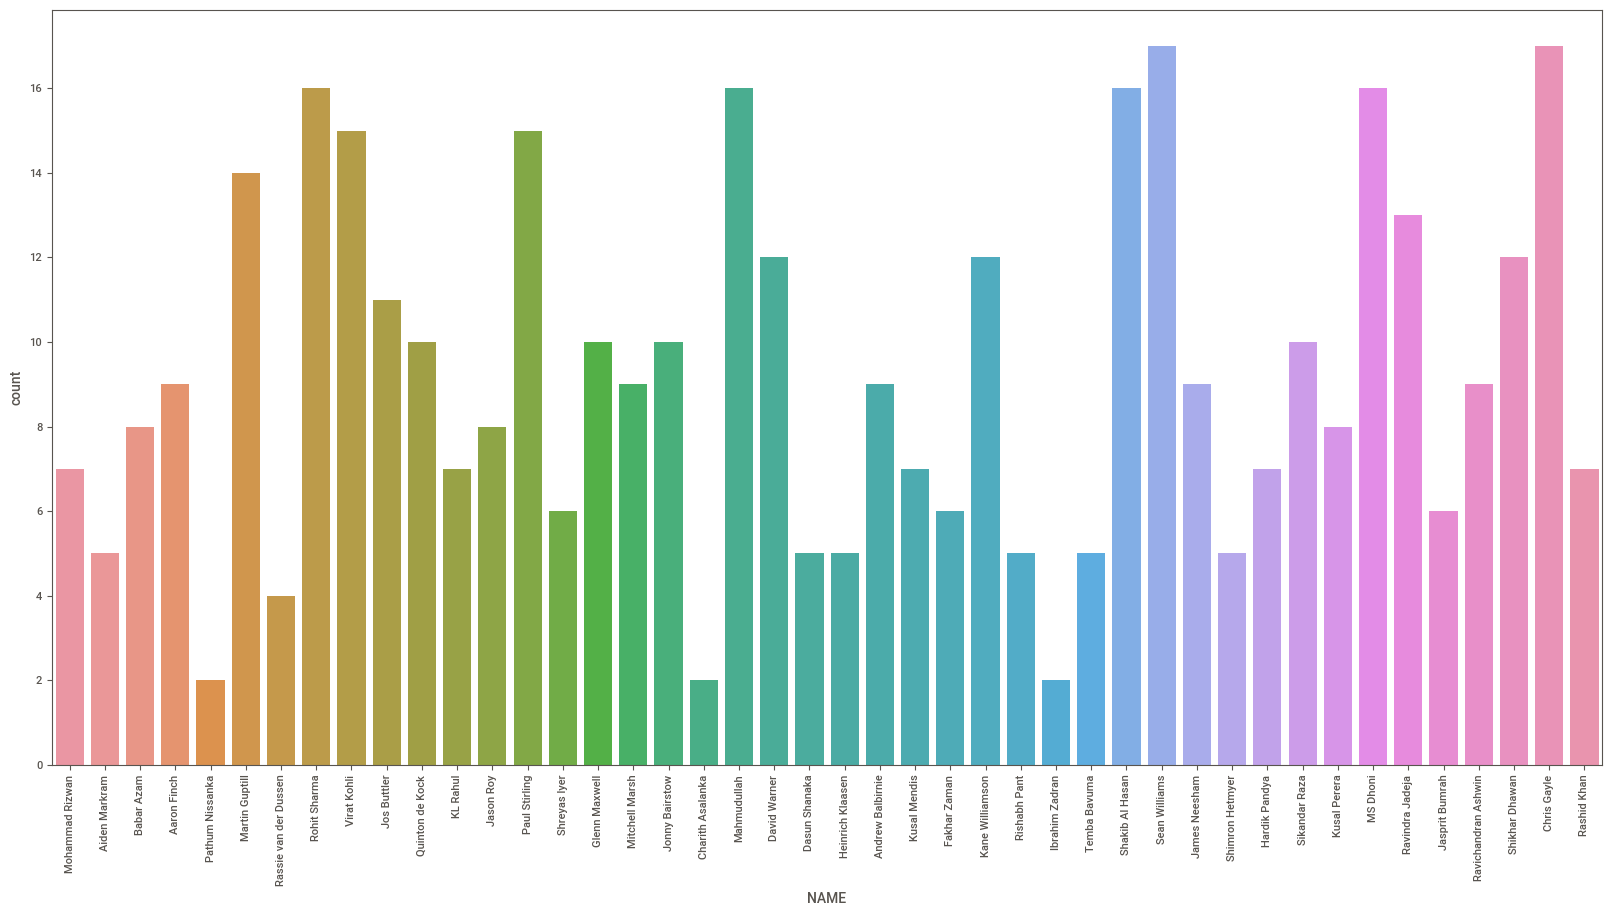

In [103]:
plt.figure(figsize=(20,10))
sb.countplot(x=odi['NAME'])
plt.xticks(rotation=90)
plt.show()

In [101]:
odicond=odi[odi['STRIKE_RATE']>114]

In [124]:
avgodi=[]
for i in odicond['NAME'].unique():
    avgodi.append(odicond[odicond['NAME']==i]['STRIKE_RATE'].mean())
final_odi=pd.DataFrame(avgodi,index=odicond['NAME'].unique())
final_odi

,0
Martin Guptill,118.300000
Jos Buttler,128.080000
Jason Roy,119.450000
Paul Stirling,119.300000
Glenn Maxwell,132.150000
Jonny Bairstow,119.166667
Dasun Shanaka,115.500000
Rishabh Pant,142.150000
James Neesham,123.600000
Hardik Pandya,121.800000


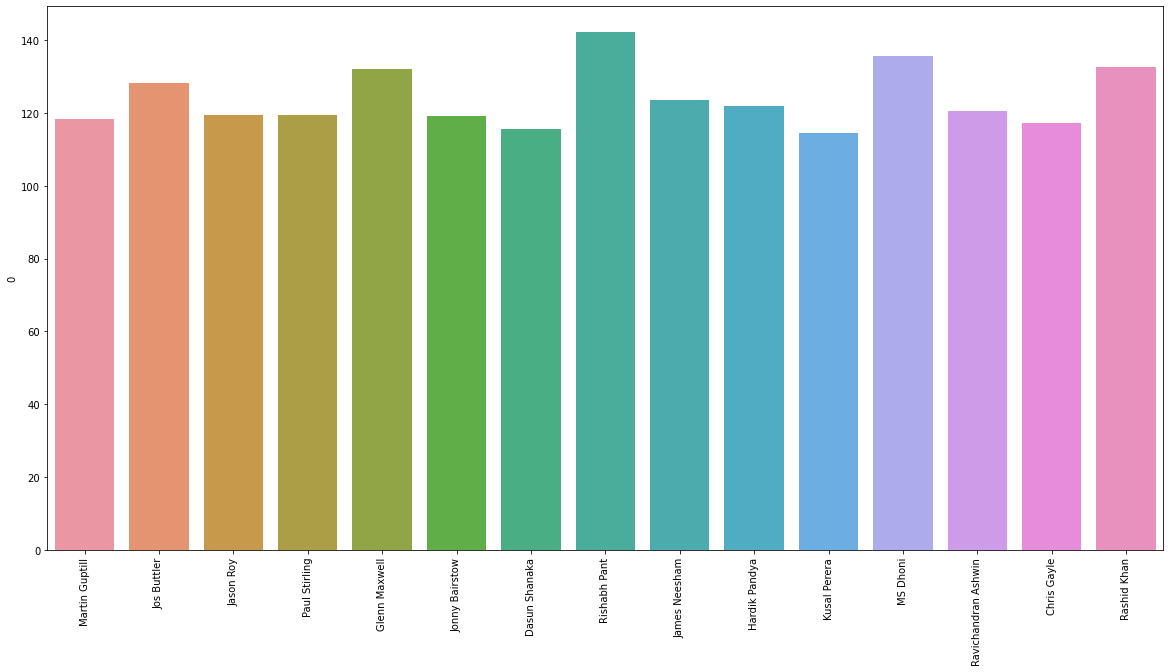

In [159]:
plt.figure(figsize=(20,10))
sb.barplot(data=final_odi,y=0,x=final_odi.index)
plt.xticks(rotation=90)
plt.title('')
plt.show()

# T20 MATCH

In [7]:
t20=dataframe.groupby('TYPE').get_group('T20')

In [142]:
t20.pivot_table(index='YEAR',columns='NAME',values='STRIKE_RATE',aggfunc={'STRIKE_RATE':np.mean},fill_value=" ")

NAME,Aaron Finch,Aiden Markram,Andrew Balbirnie,Babar Azam,Charith Asalanka,Chris Gayle,Dasun Shanaka,David Warner,Fakhar Zaman,Glenn Maxwell,Hardik Pandya,Heinrich Klaasen,Ibrahim Zadran,James Neesham,Jason Roy,Jasprit Bumrah,Jonny Bairstow,Jos Buttler,KL Rahul,Kane Williamson,Kusal Mendis,Kusal Perera,MS Dhoni,Mahmudullah,Martin Guptill,Mitchell Marsh,Mohammad Rizwan,Pathum Nissanka,Paul Stirling,Quinton de Kock,Rashid Khan,Rassie van der Dussen,Ravichandran Ashwin,Ravindra Jadeja,Rishabh Pant,Rohit Sharma,Sean Williams,Shakib Al Hasan,Shikhar Dhawan,Shimron Hetmyer,Shreyas Iyer,Sikandar Raza,Temba Bavuma,Virat Kohli
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,,,,,,83.3,,,,,,,,,,,,,,,,,0.0,,,,,,,,,,,,,,,,,,,,,
2007,,,,,,174.3,,,,,,,,,,,,,,,,,130.4,70.0,,,,,,,,,,,,,,119.6,,,,,,
2008,,,,,,151.1,,,,,,,,,,,,,,,,,33.3,40.0,,,,,,,,,,,,100.0,,100.0,,,,,,
2009,,,,,,134.0,,139.3,,,,,,,,,,,,,,,101.1,72.0,120.7,,,,106.2,,,,,87.5,,112.4,,97.0,,,,,,
2010,,,,,,134.7,,156.7,,,,,,,,,,,,,,,149.1,44.8,111.1,,,,75.9,,,,,81.8,,136.2,,121.9,,,,,,
2011,,,,,,,,114.2,,,,,,,,,75.0,118.2,,,,,86.7,40.0,130.5,171.4,,,,,,,161.5,0.0,,133.3,,46.7,45.5,,,,,117.3
2012,156.5,,,,,144.9,,133.1,,102.6,,,,129.4,,,101.4,133.6,,118.4,,,125.8,119.9,130.7,92.9,,,135.2,111.1,,,103.2,75.0,,130.3,,138.4,,,,,,132.7
2013,194.1,,,,,87.5,,131.3,,180.0,,,,,,,148.4,175.7,,,,128.1,,138.8,127.1,,,,167.3,114.7,,,,,,100.0,112.0,154.4,168.4,,,102.3,,131.8
2014,134.0,,,,,110.6,,144.9,,175.9,,,,130.0,80.0,,,115.6,,120.0,,141.9,132.8,117.2,97.2,,,,140.0,124.4,,,,142.9,,123.5,135.5,134.1,98.5,,,94.1,,133.7


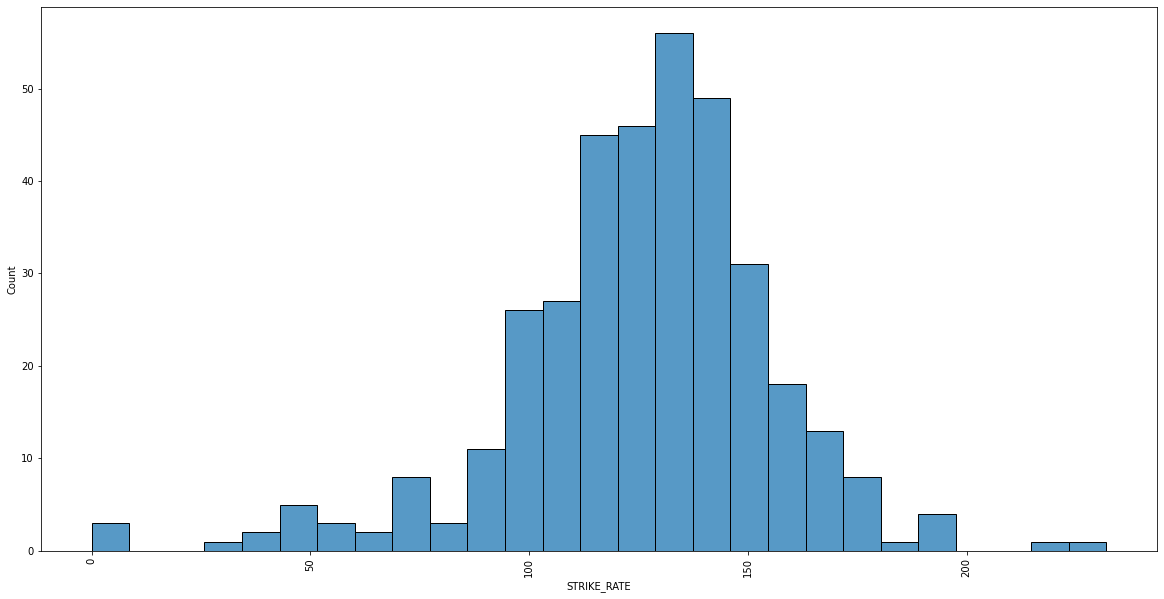

In [153]:
plt.figure(figsize=(20,10))
sb.histplot(data=t20,x='STRIKE_RATE')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

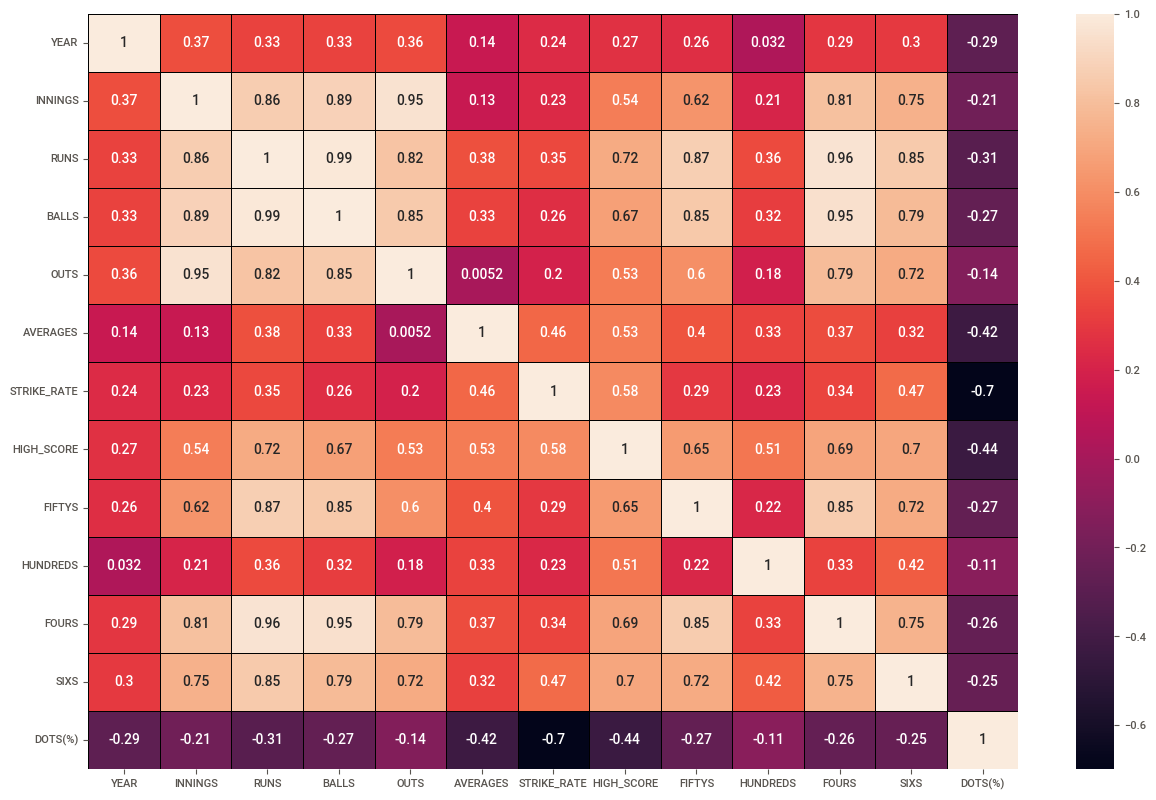

In [97]:
plt.figure(figsize=(15,10))
sb.heatmap(t20.corr(),annot=True,linewidths=0.5,linecolor='BLACK')

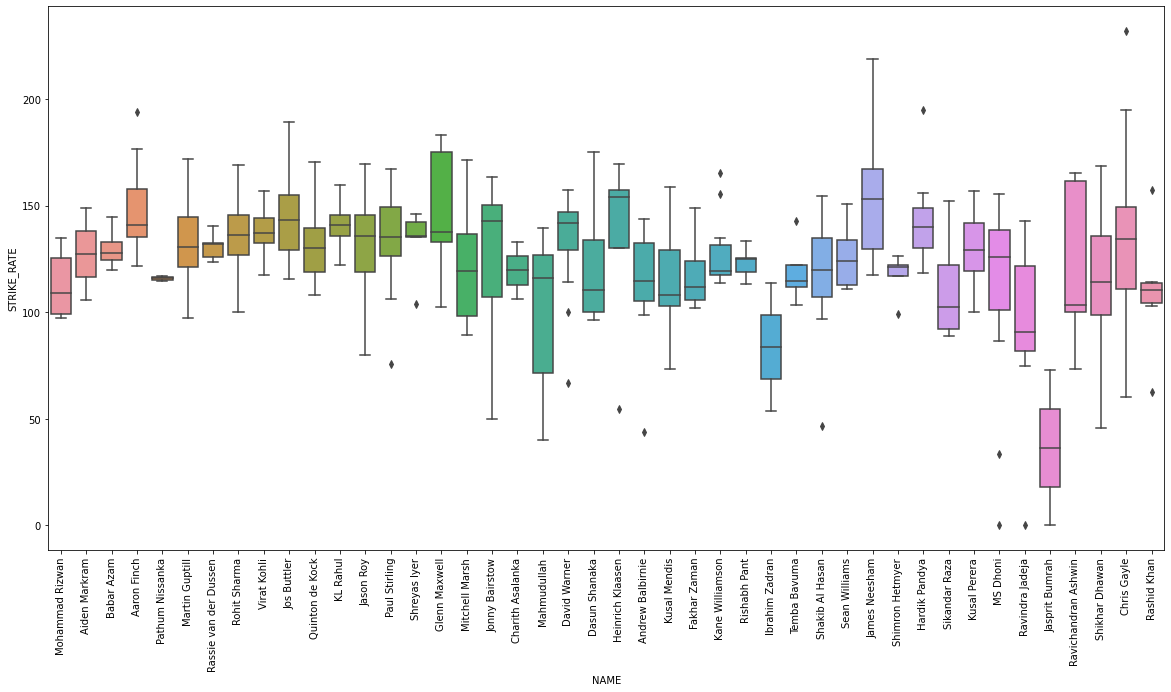

In [135]:
plt.figure(figsize=(20,10))
sb.boxplot(data=t20,y='STRIKE_RATE',x='NAME')
plt.xticks(rotation=90)
plt.show()

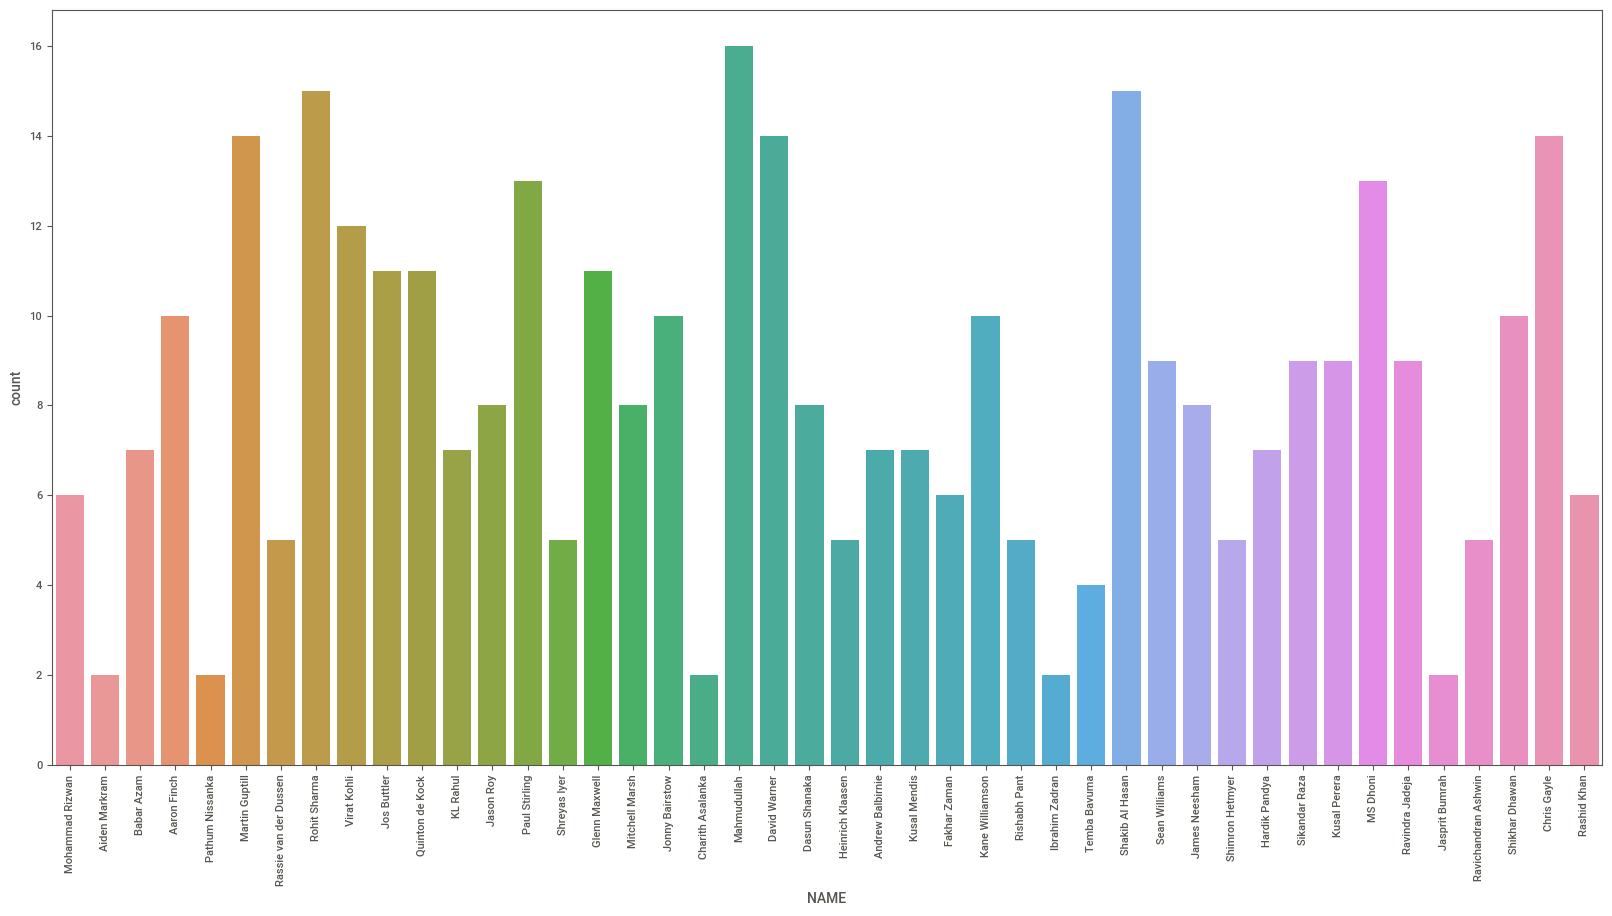

In [101]:
plt.figure(figsize=(20,10))
sb.countplot(x=t20['NAME'])
plt.xticks(rotation=90)
plt.show()

In [108]:
t20cond=t20[t20['STRIKE_RATE']>170]

In [125]:
avgt20=[]
for i in t20cond['NAME'].unique():
    avgt20.append(t20cond[t20cond['NAME']==i]['STRIKE_RATE'].mean())
final_t20=pd.DataFrame(avgt20,index=t20cond['NAME'].unique())
final_t20

,0
Aaron Finch,185.250000
Martin Guptill,171.900000
Jos Buttler,182.400000
Quinton de Kock,170.700000
Glenn Maxwell,178.475000
Mitchell Marsh,171.400000
Dasun Shanaka,175.000000
James Neesham,194.950000
Hardik Pandya,194.800000
Chris Gayle,200.333333


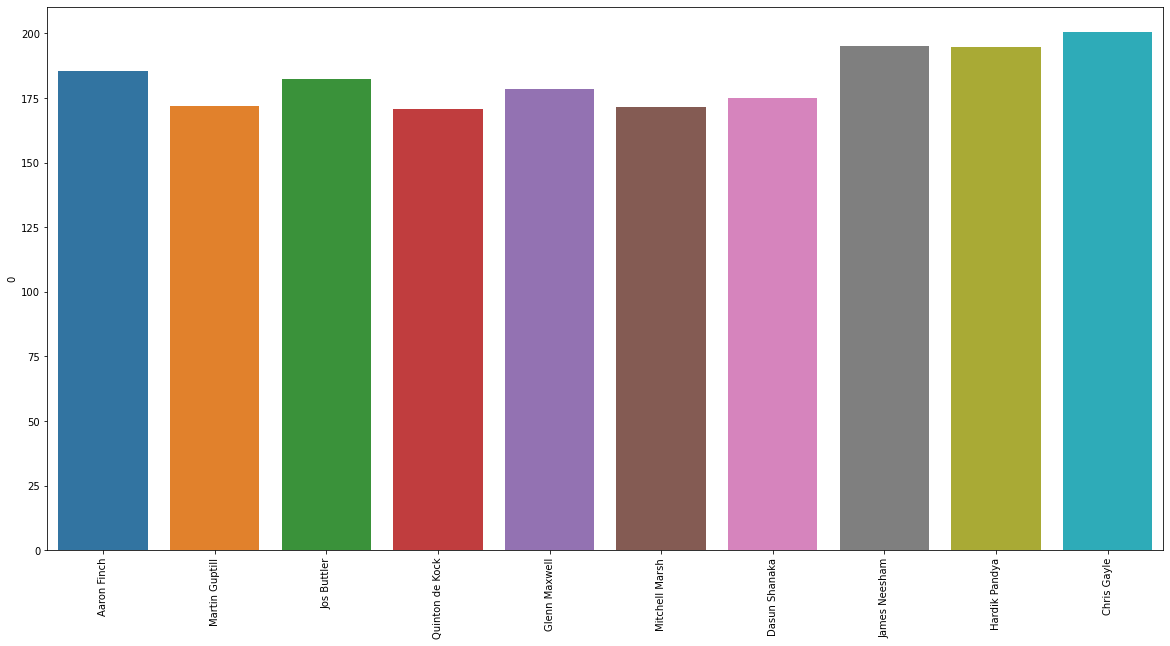

In [160]:
plt.figure(figsize=(20,10))
sb.barplot(data=final_t20,y=0,x=final_t20.index)
plt.xticks(rotation=90)
plt.title('')
plt.show()

# PL MATCH

In [8]:
pl=dataframe.groupby('TYPE').get_group('PL')

In [143]:
pl.pivot_table(index='YEAR',columns='NAME',values='STRIKE_RATE',aggfunc={'STRIKE_RATE':np.mean},fill_value=" ")

NAME,Aaron Finch,Aiden Markram,Andrew Balbirnie,Babar Azam,Charith Asalanka,Chris Gayle,Dasun Shanaka,David Warner,Fakhar Zaman,Glenn Maxwell,Hardik Pandya,Heinrich Klaasen,Ibrahim Zadran,James Neesham,Jason Roy,Jasprit Bumrah,Jonny Bairstow,Jos Buttler,KL Rahul,Kane Williamson,Kusal Mendis,Kusal Perera,MS Dhoni,Mahmudullah,Martin Guptill,Mitchell Marsh,Mohammad Rizwan,Pathum Nissanka,Paul Stirling,Quinton de Kock,Rashid Khan,Rassie van der Dussen,Ravichandran Ashwin,Ravindra Jadeja,Rishabh Pant,Rohit Sharma,Sean Williams,Shakib Al Hasan,Shikhar Dhawan,Shimron Hetmyer,Shreyas Iyer,Sikandar Raza,Temba Bavuma,Virat Kohli
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,,,,,,,,,,,,,,,,,,,,,,,133.5,,,,,,,,,,,131.1,,148.0,,,115.3,,,,,105.1
2009,,,,,,119.6,,132.6,,,,,,,,,,,,,,,127.2,,,,,,,,,,53.3,110.9,,114.2,,,88.9,,,,,120.4
2010,141.6,,,,,158.7,,147.6,,50.0,,,,,,,,,,,,106.5,135.0,,,93.3,,,,,,,81.4,,,133.8,,,108.5,,,,,147.9
2011,111.9,,,,,177.6,,145.8,,142.6,,,,,,,,93.0,,,,161.9,144.6,,90.0,109.7,,,,,,,30.0,124.1,,125.3,,120.4,129.0,,,,,127.5
2012,132.1,,,,,154.0,,157.4,,146.9,,,,,136.4,,,,,,,,131.4,117.2,103.8,122.0,,,,94.5,,,169.0,125.5,,122.0,,130.4,129.6,,,,,111.7
2013,135.0,,,,,144.5,,129.9,,141.9,,,,168.6,127.6,,80.0,162.1,125.0,,,129.4,164.8,113.1,119.3,126.3,,,151.5,138.2,,80.0,109.8,140.1,,135.9,,142.0,127.8,,,,68.4,138.7
2014,125.1,,33.3,,,116.2,,140.8,,168.0,,,,101.2,157.1,,143.1,163.3,101.2,138.7,,126.2,153.6,,126.1,127.5,,,130.6,117.7,,,98.1,155.8,,129.1,,144.7,118.2,,,,,122.1
2015,119.0,,102.3,,,159.4,,156.5,,143.2,180.6,,,,150.8,,134.5,166.0,112.7,114.8,,,122.0,100.4,118.8,50.0,,,175.0,158.4,,,162.5,104.8,,144.7,,108.8,123.4,,128.4,,,130.8
2016,139.9,,,57.7,,158.2,,151.4,,155.2,69.8,,,135.4,164.8,72.7,92.9,158.9,146.5,113.3,,,135.2,118.2,120.1,127.2,127.2,,154.7,136.1,152.9,,107.9,107.9,130.3,132.9,,112.6,116.8,0.0,69.8,,,152.0


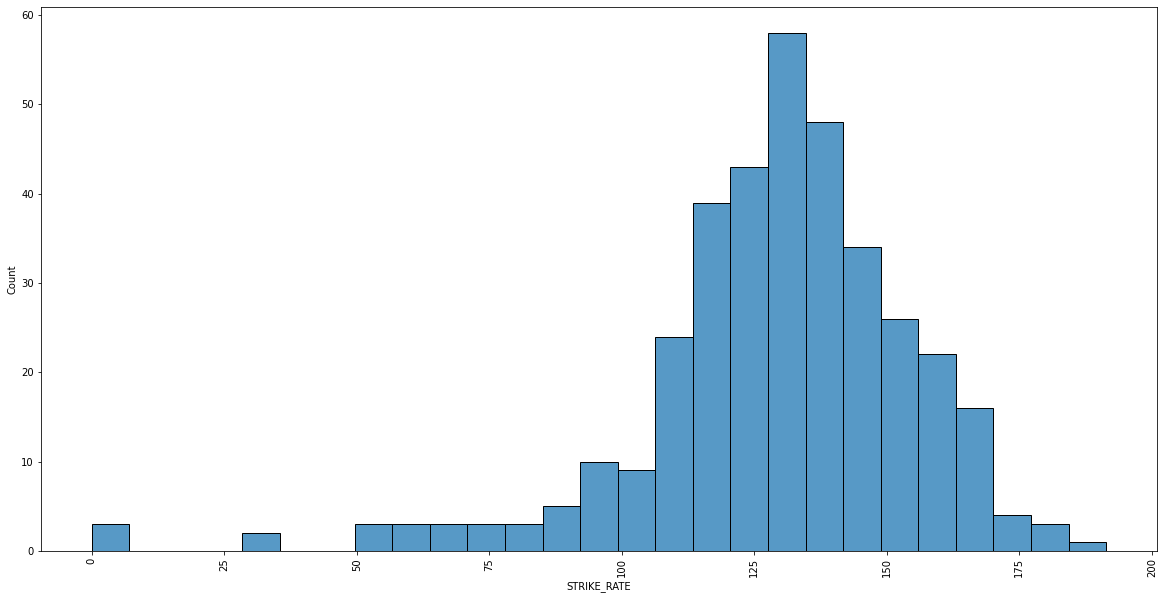

In [154]:
plt.figure(figsize=(20,10))
sb.histplot(data=pl,x='STRIKE_RATE')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

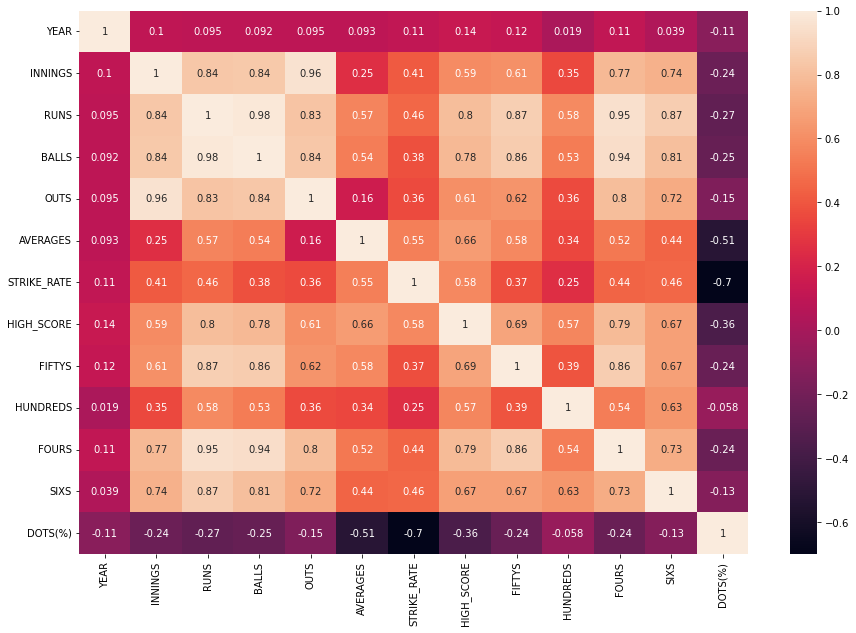

In [192]:
plt.figure(figsize=(15,10))
sb.heatmap(pl.corr(),annot=True)

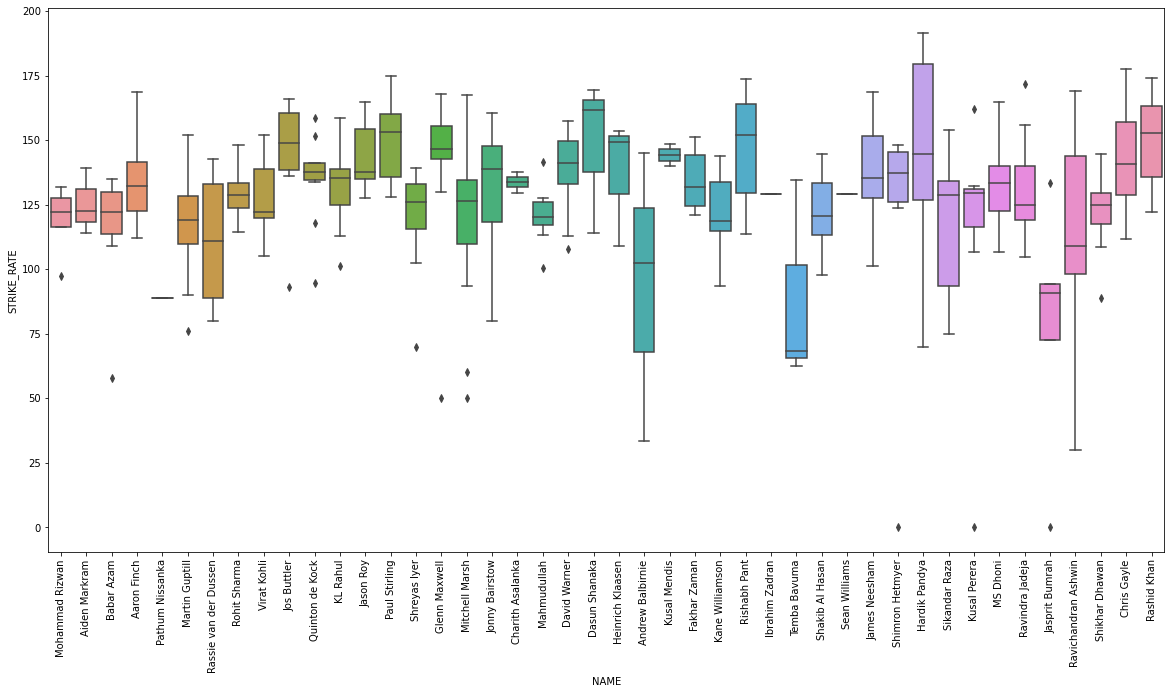

In [136]:
plt.figure(figsize=(20,10))
sb.boxplot(data=pl,y='STRIKE_RATE',x='NAME')
plt.xticks(rotation=90)
plt.show()

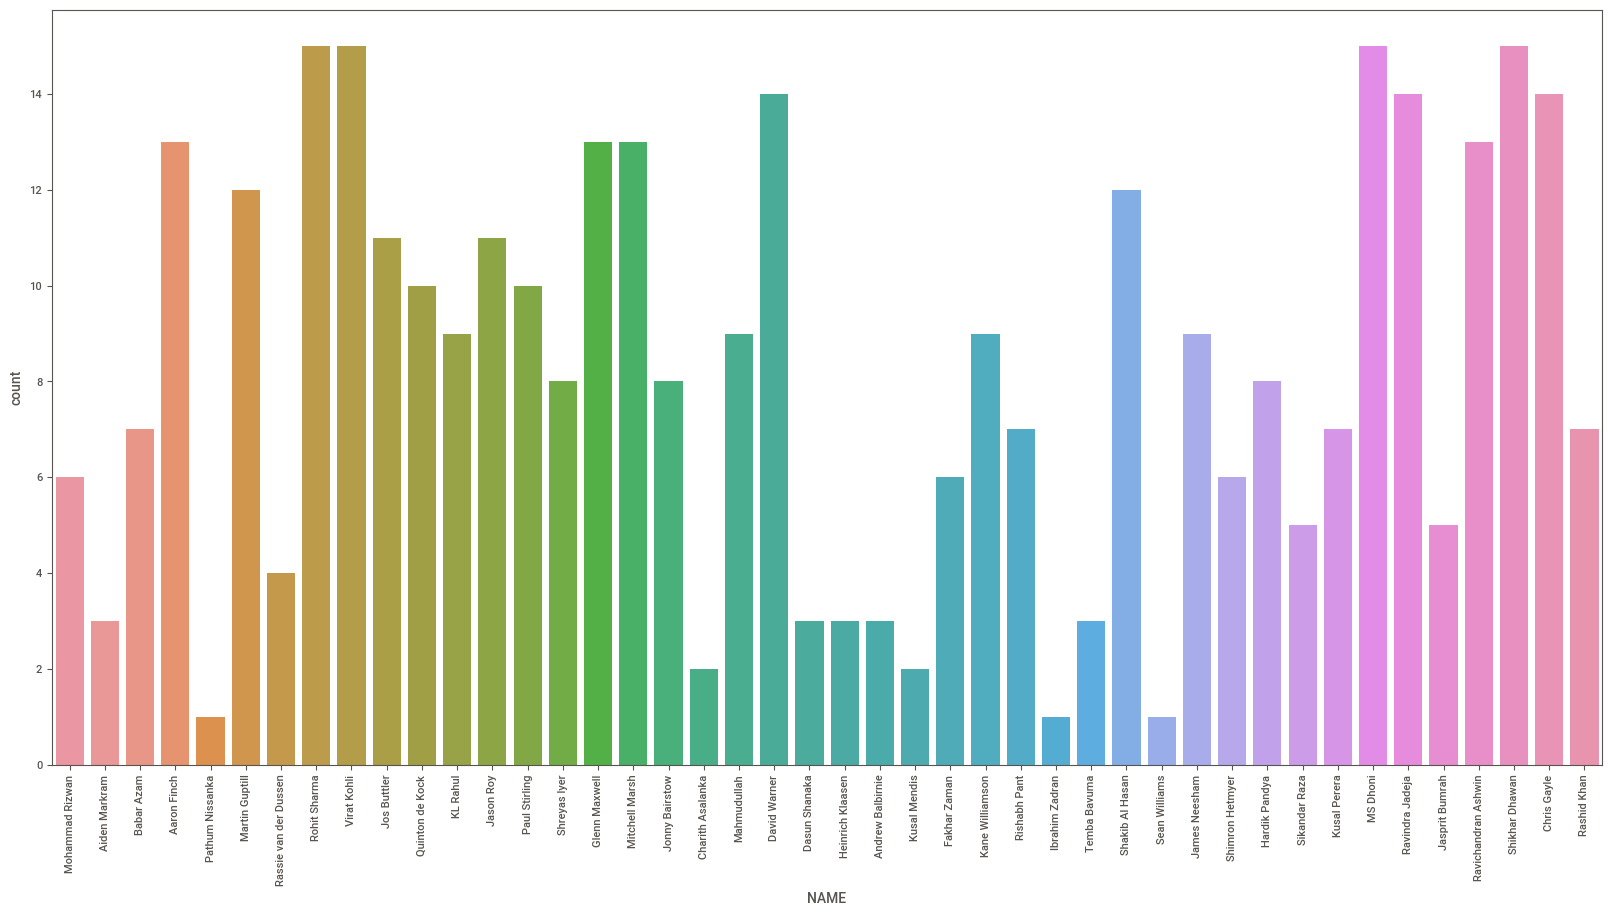

In [102]:
plt.figure(figsize=(20,10))
sb.countplot(x=pl['NAME'])
plt.xticks(rotation=90)
plt.show()

In [115]:
plcond=pl[pl['STRIKE_RATE']>168]

In [126]:
avgpl=[]
for i in plcond['NAME'].unique():
    avgpl.append(plcond[plcond['NAME']==i]['STRIKE_RATE'].mean())
final_pl=pd.DataFrame(avgpl,index=plcond['NAME'].unique())
final_pl

,0
Aaron Finch,168.500000
Paul Stirling,175.000000
Dasun Shanaka,169.300000
Rishabh Pant,173.600000
James Neesham,168.500000
Hardik Pandya,183.666667
Ravindra Jadeja,171.900000
Ravichandran Ashwin,169.000000
Chris Gayle,177.600000
Rashid Khan,174.000000


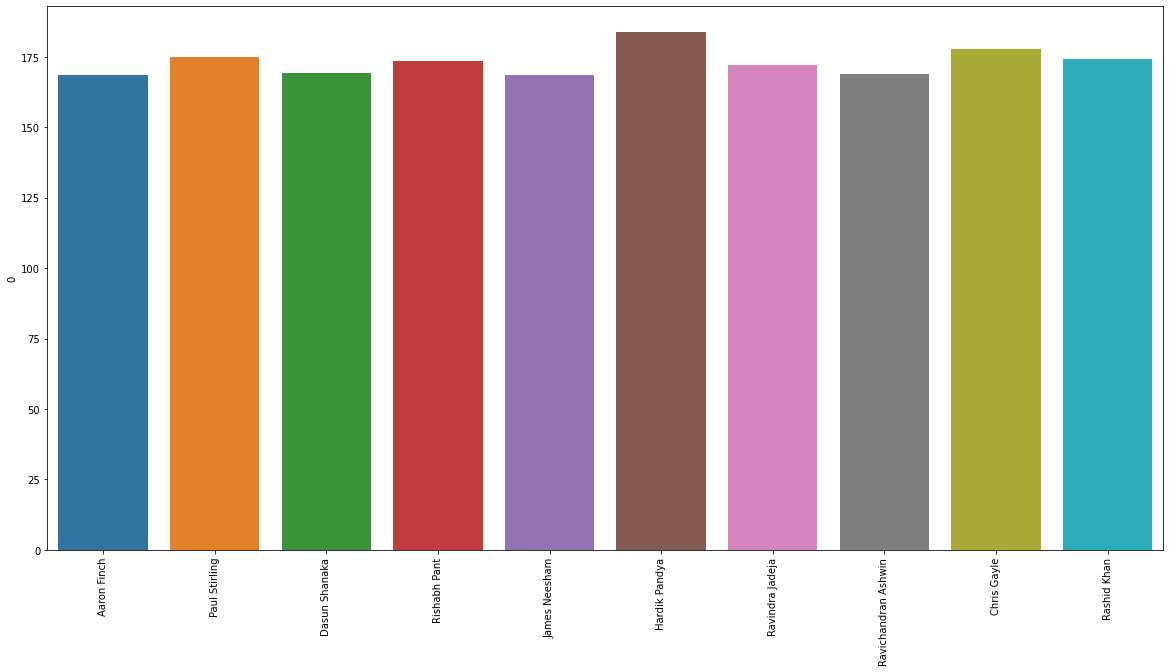

In [161]:
plt.figure(figsize=(20,10))
sb.barplot(data=final_pl,y=0,x=final_pl.index)
plt.xticks(rotation=90)
plt.title('')
plt.show()

# CONCULDING THE PROBLEM STATEMENT 

In [127]:
stest=set(final_test.index)
sodi=set(final_odi.index)
st20=set(final_t20.index)
spl=set(final_pl.index)

In [128]:
t1=stest.intersection(sodi.intersection(st20.intersection(spl)))
t21=stest.intersection(sodi.intersection(st20))
t22=stest.intersection(sodi.intersection(spl))
t23=stest.intersection(st20.intersection(spl))
t24=sodi.intersection(st20.intersection(spl))
t2=t21.union(t22.union(t23.union(t24)))
print(t1,t2)

{'Dasun Shanaka'} {'Chris Gayle', 'Rishabh Pant', 'Dasun Shanaka', 'Hardik Pandya', 'James Neesham'}


In [11]:
final_list=['Chris Gayle', 'Rishabh Pant', 'Dasun Shanaka', 'Hardik Pandya', 'James Neesham']

In [18]:
testfinal=pd.DataFrame()
odifinal=pd.DataFrame()
t20final=pd.DataFrame()
plfinal=pd.DataFrame()
for i in final_list:
    testfinal=testfinal.append(test.groupby('NAME').get_group(i))
    odifinal=odifinal.append(odi.groupby('NAME').get_group(i))
    t20final=t20final.append(t20.groupby('NAME').get_group(i))
    plfinal=plfinal.append(pl.groupby('NAME').get_group(i))


In [19]:
testfinal

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
1326,TEST,Chris Gayle,2002,23,916,1864,22,41.6,49.1,204,7,1,159,3,80.3
1327,TEST,Chris Gayle,2003,13,312,657,13,24.0,47.5,71,2,0,51,1,80.1
1328,TEST,Chris Gayle,2004,22,1135,1592,21,54.0,71.3,141,7,4,185,6,70.3
1329,TEST,Chris Gayle,2005,13,534,849,13,41.1,62.9,317,2,1,66,8,70.2
1330,TEST,Chris Gayle,2006,18,690,1203,18,38.3,57.4,93,6,0,98,13,76.4
1331,TEST,Chris Gayle,2007,10,315,398,9,35.0,79.1,66,2,0,51,2,67.8
1332,TEST,Chris Gayle,2008,11,533,904,10,53.3,59.0,197,2,1,67,14,75.2
1333,TEST,Chris Gayle,2009,16,739,1091,15,49.3,67.7,165,1,4,82,18,68.9
1334,TEST,Chris Gayle,2010,9,525,749,9,58.3,70.1,333,2,1,63,10,65.3
1335,TEST,Chris Gayle,2012,8,318,421,6,53.0,75.5,150,1,1,36,10,67.5


In [20]:
odifinal

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
1338,ODI,Chris Gayle,2002,22,1097,1238,22,49.9,88.6,140,7,3,134,25,60.3
1339,ODI,Chris Gayle,2003,21,981,1256,20,49.0,78.1,153,6,3,120,13,62.1
1340,ODI,Chris Gayle,2004,22,722,1014,19,38.0,71.2,152,2,2,78,8,63.4
1341,ODI,Chris Gayle,2005,17,563,635,17,33.1,88.7,132,2,2,60,6,54.5
1342,ODI,Chris Gayle,2006,32,1217,1453,29,42.0,83.8,133,4,4,165,24,62.6
1343,ODI,Chris Gayle,2007,19,560,696,17,32.9,80.5,85,5,0,63,14,61.5
1344,ODI,Chris Gayle,2008,13,633,690,12,52.8,91.7,122,3,3,60,26,57.4
1345,ODI,Chris Gayle,2009,15,552,469,14,39.4,117.7,134,2,1,56,27,52.5
1346,ODI,Chris Gayle,2010,15,456,470,14,32.6,97.0,88,3,0,48,14,55.3
1347,ODI,Chris Gayle,2011,8,202,221,7,28.9,91.4,80,1,0,27,4,58.4


In [21]:
t20final

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
1355,T20,Chris Gayle,2006,1,10,12,1,10.0,83.3,10,0,0,2,0,75.0
1356,T20,Chris Gayle,2007,4,183,105,4,45.8,174.3,117,1,1,16,11,34.3
1357,T20,Chris Gayle,2008,2,68,45,2,34.0,151.1,67,1,0,5,5,42.2
1358,T20,Chris Gayle,2009,5,193,144,4,48.2,134.0,88,2,0,21,8,45.1
1359,T20,Chris Gayle,2010,8,163,121,8,20.4,134.7,98,1,0,13,10,45.5
1360,T20,Chris Gayle,2012,10,368,254,8,46.0,144.9,85,5,0,30,25,42.9
1361,T20,Chris Gayle,2013,3,14,16,3,4.7,87.5,8,0,0,1,1,62.5
1362,T20,Chris Gayle,2014,8,240,217,8,30.0,110.6,53,1,0,20,12,47.9
1363,T20,Chris Gayle,2015,2,167,72,2,83.5,231.9,90,2,0,14,15,33.3
1364,T20,Chris Gayle,2016,4,113,58,3,37.7,194.8,100,0,1,8,11,41.4


In [22]:
plfinal

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
1369,PL,Chris Gayle,2009,7,171,143,6,28.5,119.6,44,0,0,15,10,51.0
1370,PL,Chris Gayle,2010,9,292,184,9,32.4,158.7,88,2,0,30,16,37.5
1371,PL,Chris Gayle,2011,21,1044,588,17,61.4,177.6,107,6,3,79,84,37.8
1372,PL,Chris Gayle,2012,28,1164,756,24,48.5,154.0,128,8,3,70,96,41.0
1373,PL,Chris Gayle,2013,28,1123,777,23,48.8,144.5,175,6,2,88,78,44.1
1374,PL,Chris Gayle,2014,20,559,481,18,31.1,116.2,111,2,1,42,36,50.7
1375,PL,Chris Gayle,2015,34,1498,940,26,57.6,159.4,151,8,3,109,120,42.1
1376,PL,Chris Gayle,2016,42,1158,732,39,29.7,158.2,108,7,1,83,100,46.9
1377,PL,Chris Gayle,2017,40,1222,873,33,37.0,140.0,146,7,2,78,96,45.4
1378,PL,Chris Gayle,2018,32,838,661,30,27.9,126.8,104,6,1,78,54,51.3


<Figure size 1440x720 with 0 Axes>

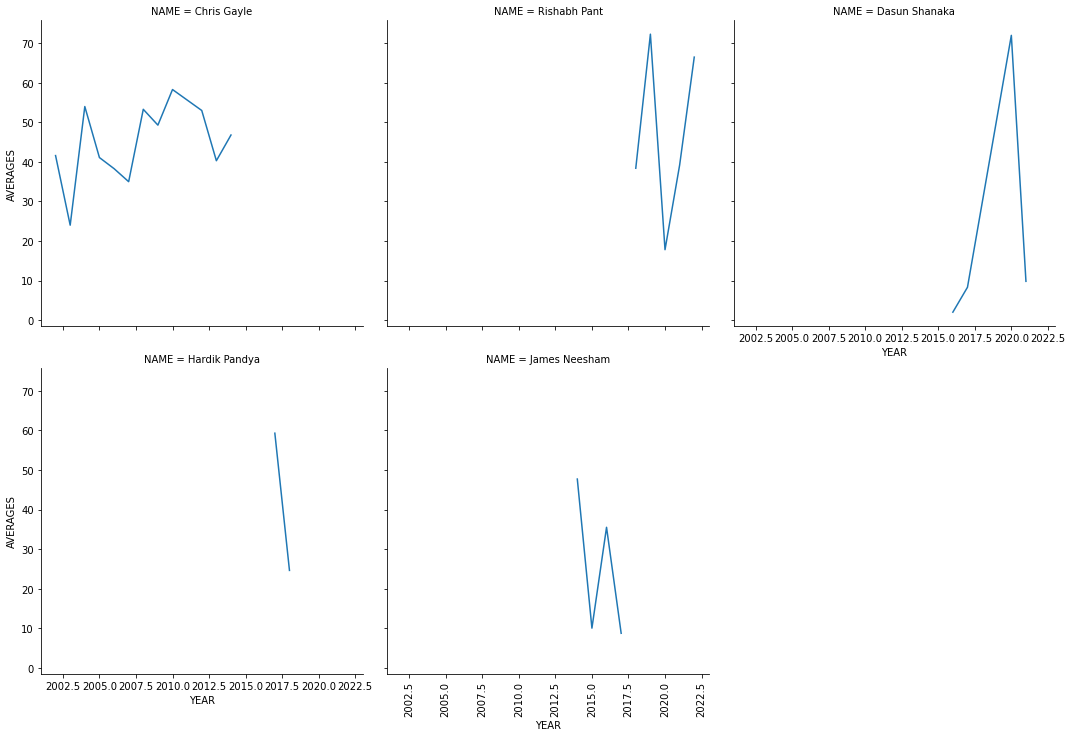

In [23]:
plt.figure(figsize=(20,10))
sb.relplot(data=testfinal,y='AVERAGES',x='YEAR',col='NAME',col_wrap=3,kind='line',markers='o')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

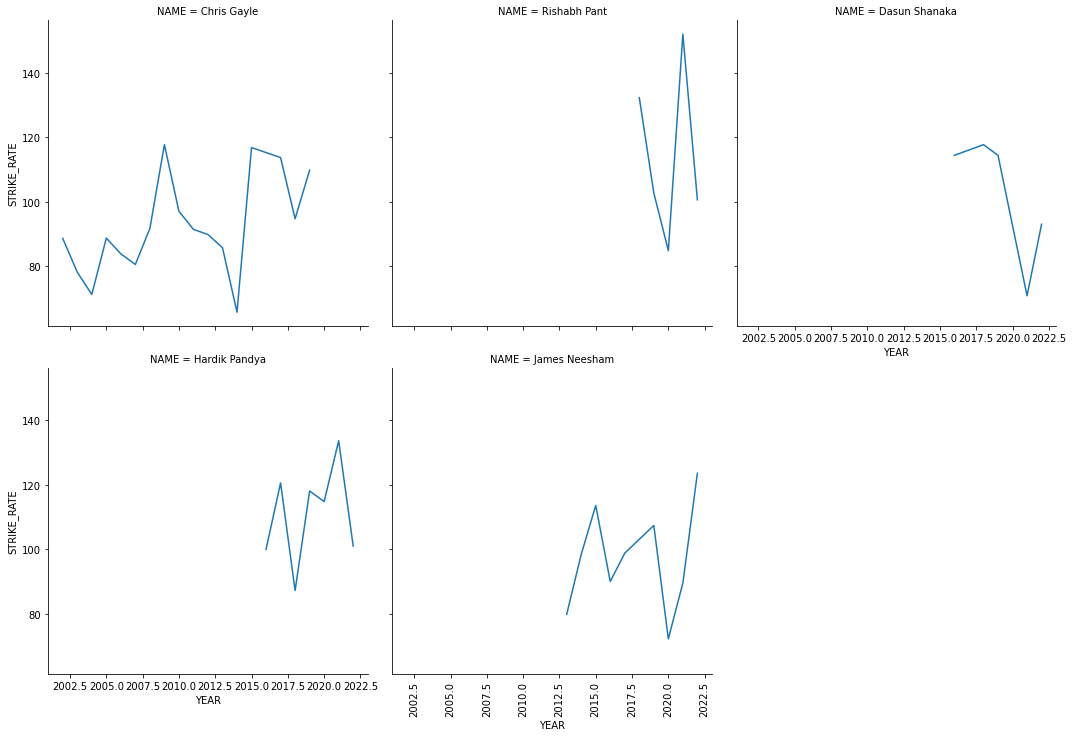

In [25]:
plt.figure(figsize=(20,10))
sb.relplot(data=odifinal,y='STRIKE_RATE',x='YEAR',col='NAME',col_wrap=3,kind='line',markers='o')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

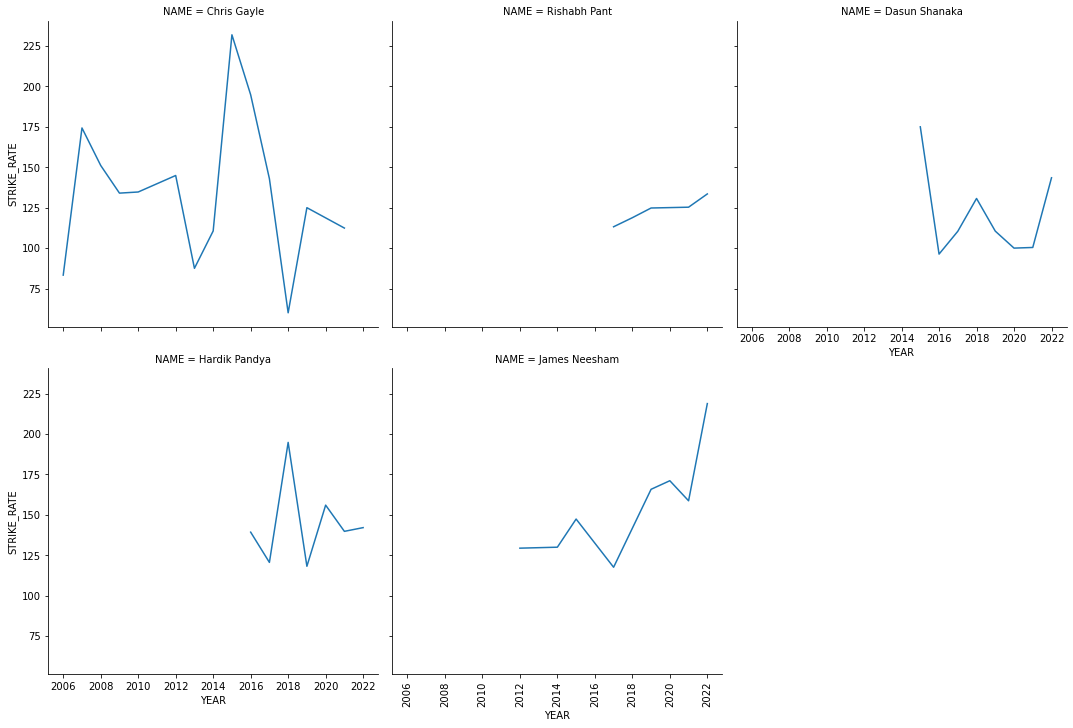

In [26]:
plt.figure(figsize=(20,10))
sb.relplot(data=t20final,y='STRIKE_RATE',x='YEAR',col='NAME',col_wrap=3,kind='line',markers='o')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

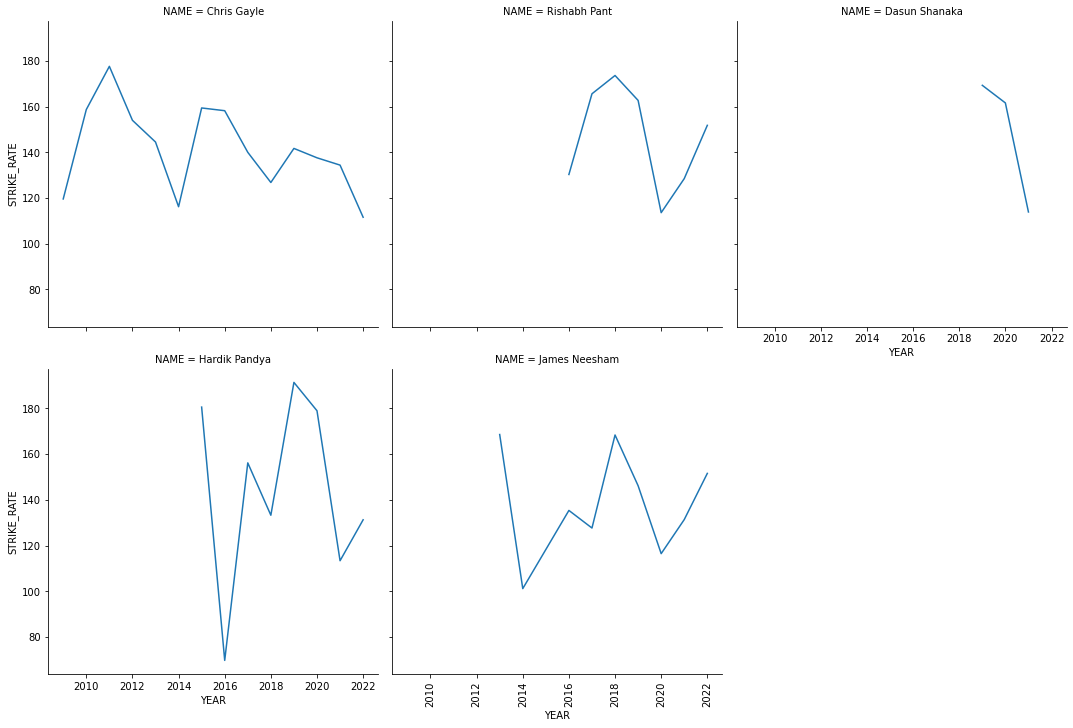

In [27]:
plt.figure(figsize=(20,10))
sb.relplot(data=plfinal,y='STRIKE_RATE',x='YEAR',col='NAME',col_wrap=3,kind='line',markers='o')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

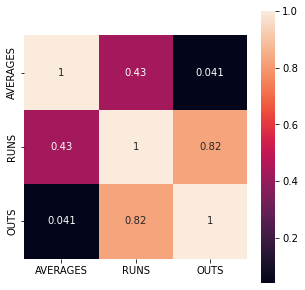

In [12]:
plt.figure(figsize=(5,5))
sb.heatmap(test[['AVERAGES','RUNS','OUTS']].corr(),annot=True,square=True)

<AxesSubplot:>

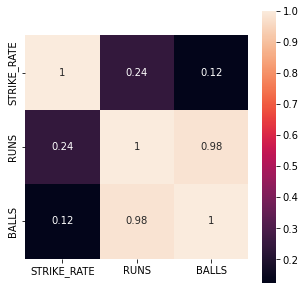

In [9]:
plt.figure(figsize=(5,5))
sb.heatmap(odi[['STRIKE_RATE','RUNS','BALLS']].corr(),annot=True,square=True)

<AxesSubplot:>

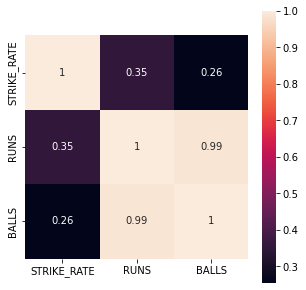

In [10]:
plt.figure(figsize=(5,5))
sb.heatmap(t20[['STRIKE_RATE','RUNS','BALLS']].corr(),annot=True,square=True)

<AxesSubplot:>

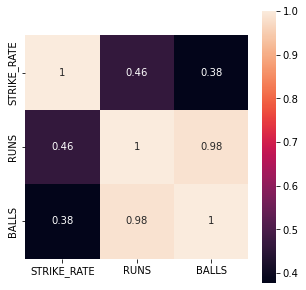

In [11]:
plt.figure(figsize=(5,5))
sb.heatmap(pl[['STRIKE_RATE','RUNS','BALLS']].corr(),annot=True,square=True)

In [ ]:
pl.pivot_table(index='YEAR',columns='NAME',values='STRIKE_RATE',aggfunc={'STRIKE_RATE':np.mean},fill_value=" ")

In [5]:
dataframe.pivot_table(index='YEAR',columns=['TYPE','NAME'],values='STRIKE_RATE')

TYPE         ODI                                                             \
NAME Aaron Finch Aiden Markram Andrew Balbirnie Babar Azam Charith Asalanka   
YEAR                                                                          
2002         NaN           NaN              NaN        NaN              NaN   
2003         NaN           NaN              NaN        NaN              NaN   
2004         NaN           NaN              NaN        NaN              NaN   
2005         NaN           NaN              NaN        NaN              NaN   
2006         NaN           NaN              NaN        NaN              NaN   
2007         NaN           NaN              NaN        NaN              NaN   
2008         NaN           NaN              NaN        NaN              NaN   
2009         NaN           NaN              NaN        NaN              NaN   
2010         NaN           NaN             36.8        NaN              NaN   
2011         NaN           NaN              NaN        NaN              NaN   
2012         NaN           NaN              NaN        NaN              NaN   
2013        91.8           NaN              NaN        NaN              NaN   
2014        84.0           NaN             44.4        NaN              NaN   
2015        88.3           NaN             77.2       89.1              NaN   
2016        94.1           NaN              NaN       95.2              NaN   
2017        92.7         110.0             77.5       79.3              NaN   
2018        89.5          84.8             67.6       81.2              NaN   
2019        89.4          80.5             87.6       92.3              NaN   
2020        81.7           NaN             86.4      101.8              NaN   
2021         NaN          93.5             72.0      108.0             85.8   
2022        71.0          95.7             67.8       90.8             92.8   

TYPE                                                                    ...  \
NAME Chris Gayle Dasun Shanaka David Warner Fakhar Zaman Glenn Maxwell  ...   
YEAR                                                                    ...   
2002        88.6           NaN          NaN          NaN           NaN  ...   
2003        78.1           NaN          NaN          NaN           NaN  ...   
2004        71.2           NaN          NaN          NaN           NaN  ...   
2005        88.7           NaN          NaN          NaN           NaN  ...   
2006        83.8           NaN          NaN          NaN           NaN  ...   
2007        80.5           NaN          NaN          NaN           NaN  ...   
2008        91.7           NaN          NaN          NaN           NaN  ...   
2009       117.7           NaN         77.4          NaN           NaN  ...   
2010        97.0           NaN          NaN          NaN           NaN  ...   
2011        91.4           NaN         78.8          NaN           NaN  ...   
2012        89.8           NaN         82.8          NaN         113.8  ...   
2013        85.7           NaN         67.5          NaN         138.7  ...   
2014        65.7           NaN         92.9          NaN         108.0  ...   
2015       116.8           NaN        110.5          NaN         135.9  ...   
2016         NaN         114.4        105.5          NaN         121.3  ...   
2017       113.7           NaN        102.8        100.5         113.3  ...   
2018        94.7         117.7         94.8         96.5          98.6  ...   
2019       109.8         114.4         89.4         90.9         132.3  ...   
2020         NaN           NaN         95.3        100.0         145.3  ...   
2021         NaN          70.8          NaN         91.9           NaN  ...   
2022         NaN          93.0         87.5         86.1         119.4  ...   

TYPE         TEST                                                            \
NAME Rishabh Pant Rohit Sharma Sean Williams Shakib Al Hasan Shikhar Dhawan   
YEAR                                            

In [13]:
list(pd.Series([1,2,3,4,5,np.nan,6,7,8,9,np.nan]).fillna(2))

[1.0, 2.0, 3.0, 4.0, 5.0, 2.0, 6.0, 7.0, 8.0, 9.0, 2.0]

In [24]:
dataframe['NAME'][0]='VAMSI'

In [25]:
dataframe

,TYPE,NAME,YEAR,INNINGS,RUNS,BALLS,OUTS,AVERAGES,STRIKE_RATE,HIGH_SCORE,FIFTYS,HUNDREDS,FOURS,SIXS,DOTS(%)
0,TEST,VAMSI,2016,2,13,34,1,13.0,38.2,13,0,0,2,0,79.4
1,TEST,Mohammad Rizwan,2019,6,202,306,5,40.4,66.0,95,1,0,24,0,65.4
2,TEST,Mohammad Rizwan,2020,7,302,692,7,43.1,43.6,72,4,0,29,1,76.6
3,TEST,Mohammad Rizwan,2021,13,455,907,10,45.5,50.2,115,2,1,60,2,75.2
4,TEST,Mohammad Rizwan,2022,9,260,469,7,37.1,55.4,104,0,1,28,1,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,PL,Rashid Khan,2018,17,125,78,12,10.4,160.3,34,0,0,7,11,44.9
1401,PL,Rashid Khan,2019,25,218,131,20,10.9,166.4,40,0,0,17,15,39.7
1402,PL,Rashid Khan,2020,25,205,168,19,10.8,122.0,29,0,0,13,12,44.6
1403,PL,Rashid Khan,2021,31,266,196,24,11.1,135.7,27,0,0,29,9,40.3
